### FINAL PROJECT NOTEBOOK
---

**Team C**
- Hakshay Sundar
- Atiq Sohail Mohammed
- Quihao Gu (Charles)
- Saketh Krishna Dude

<br>This is the submission for the Final Project  - Exploring Techniques for  Explainaility of Lending CLub Data


### PREPROCESSING THE LENDING CLUB DATA


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("lc_14to16.csv.zip", compression='zip')
display(df.head(10))

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   
5  68426831        NaN    11950.0      11950.0          11950.0   36 months   
6  68476668        NaN    20000.0      20000.0          20000.0   36 months   
7  67275481        NaN    20000.0      20000.0          20000.0   36 months   
8  68466926        NaN    10000.0      10000.0          10000.0   36 months   
9  68616873        NaN     8000.0       8000.0           8000.0   36 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN   
3     14.85       829.90     C        C5  ...                            NaN   
4     22.45       289.91     F        F1  ...                            NaN   
5     13.44       405.18     C        C3  ...                            NaN   
6      9.17       637.58     B        B2  ...                            NaN   
7      8.49       631.26     B        B1  ...                            NaN   
8      6.49       306.45     A        A2  ...                            NaN   
9     11.48       263.74     B        B5  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   
5                          NaN                Cash                     N   
6                          NaN                Cash                     N   
7                          NaN                Cash                     N   
8                          NaN                Cash                     N   
9                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   
5                       NaN               NaN             NaN   
6                       NaN               NaN             NaN   
7                       NaN               NaN             NaN   
8                       NaN               NaN             NaN   
9                       NaN               NaN             NaN   

  settlement_amount settlement_percentage settlement_term  
0               NaN                   NaN             NaN  
1               NaN                   NaN             NaN  
2               NaN                   NaN             NaN  
3               NaN                   NaN             NaN  
4               NaN                   NaN             NaN  
5               NaN                   NaN             NaN  
6               NaN                   NaN             NaN  
7               NaN                   NaN             NaN  
8               NaN                   NaN             NaN  
9               NaN                   NaN             NaN  

[10 rows x 151 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091131 entries, 0 to 1091130
Columns: 151 entries, id to settlement_term
dtypes: float64(114), int64(1), object(36)
memory usage: 1.2+ GB


In [6]:
df = df.drop(columns=['member_id', 'addr_state', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'desc', 'earliest_cr_line', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_status', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'next_pymnt_d', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_op_past_12m', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_act_il', 'open_rv_12m', 'open_rv_24m', 'out_prncp', 'out_prncp_inv', 'policy_code', 'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'tax_liens', 'term', 'title', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_acc', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 'total_cu_tl', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 'url', 'verification_status', 'zip_code', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'hardship_flag', 'verification_status_joint', 'fico_range_low', 'fico_range_high', 'last_fico_range_high', 'last_fico_range_low', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'il_util', 'inq_last_12m', 'mo_sin_old_il_acct', 'mths_since_recent_inq', 'num_sats', 'num_rev_tl_bal_gt_0', ])


In [6]:
# Printing shape of dataframe
print("Shape of dataframe: ", df.shape)
print("Listing all columns in dataframe:\n")
for col in df.columns:
    print(col, end=', ')

Shape of dataframe:  (1091131, 26)
Listing all columns in dataframe:

loan_amnt, grade, emp_length, home_ownership, annual_inc, dti, delinq_2yrs, inq_last_6mths, mths_since_last_delinq, open_acc, pub_rec, acc_now_delinq, max_bal_bc, all_util, inq_fi, acc_open_past_24mths, avg_cur_bal, delinq_amnt, mort_acc, mths_since_recent_bc_dlq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_tl_90g_dpd_24m, pct_tl_nvr_dlq, percent_bc_gt_75, pub_rec_bankruptcies, 

In [7]:
df.describe()

loan_amnt    annual_inc           dti   delinq_2yrs  inq_last_6mths  \
count  1.091131e+06  1.091131e+06  1.091066e+06  1.091131e+06    1.091130e+06   
mean   1.495881e+04  7.751796e+04  1.879634e+01  3.520109e-01    6.077488e-01   
std    8.716084e+03  7.181074e+04  9.360157e+00  9.301704e-01    9.071993e-01   
min    1.000000e+03  0.000000e+00 -1.000000e+00  0.000000e+00    0.000000e+00   
25%    8.000000e+03  4.700000e+04  1.235000e+01  0.000000e+00    0.000000e+00   
50%    1.305000e+04  6.500000e+04  1.823000e+01  0.000000e+00    0.000000e+00   
75%    2.000000e+04  9.200000e+04  2.480000e+01  0.000000e+00    1.000000e+00   
max    4.000000e+04  9.573072e+06  9.990000e+02  3.900000e+01    6.000000e+00   

       mths_since_last_delinq      open_acc       pub_rec  acc_now_delinq  \
count           566460.000000  1.091131e+06  1.091131e+06    1.091131e+06   
mean                33.709757  1.185894e+01  2.399061e-01    6.289804e-03   
std                 21.911959  5.609509e+00  6.534303e-01    8.597781e-02   
min                  0.000000  0.000000e+00  0.000000e+00    0.000000e+00   
25%                 15.000000  8.000000e+00  0.000000e+00    0.000000e+00   
50%                 30.000000  1.100000e+01  0.000000e+00    0.000000e+00   
75%                 49.000000  1.500000e+01  0.000000e+00    0.000000e+00   
max                195.000000  9.700000e+01  8.600000e+01    1.400000e+01   

          max_bal_bc  ...   avg_cur_bal   delinq_amnt      mort_acc  \
count  455718.000000  ...  1.091125e+06  1.091131e+06  1.091131e+06   
mean     5777.327646  ...  1.330256e+04  1.747052e+01  1.669525e+00   
std      5619.377345  ...  1.594770e+04  8.676932e+02  1.981459e+00   
min         0.000000  ...  0.000000e+00  0.000000e+00  0.000000e+00   
25%      2362.000000  ...  3.168000e+03  0.000000e+00  0.000000e+00   
50%      4385.000000  ...  7.380000e+03  0.000000e+00  1.000000e+00   
75%      7460.000000  ...  1.834500e+04  0.000000e+00  3.000000e+00   
max    776843.000000  ...  7.529940e+05  1.854080e+05  6.100000e+01   

       mths_since_recent_bc_dlq  mths_since_recent_revol_delinq  \
count             282014.000000                   394082.000000   
mean                  39.227343                       35.301902   
std                   22.882740                       22.503960   
min                    0.000000                        0.000000   
25%                   20.000000                       16.000000   
50%                   37.000000                       32.000000   
75%                   58.000000                       51.000000   
max                  195.000000                      197.000000   

       num_accts_ever_120_pd  num_tl_90g_dpd_24m  pct_tl_nvr_dlq  \
count           1.091131e+06        1.091131e+06    1.091131e+06   
mean            5.311544e-01        9.470632e-02    9.387182e+01   
std             1.351860e+00        5.234997e-01    8.961503e+00   
min             0.000000e+00        0.000000e+00    0.000000e+00   
25%             0.000000e+00        0.000000e+00    9.090000e+01   
50%             0.000000e+00        0.000000e+00    9.740000e+01   
75%             0.000000e+00        0.000000e+00    1.000000e+02   
max             5.100000e+01        3.900000e+01    1.000000e+02   

       percent_bc_gt_75  pub_rec_bankruptcies  
count      1.079670e+06          1.091131e+06  
mean       4.644191e+01          1.371082e-01  
std        3.600316e+01          3.888284e-01  
min        0.000000e+00          0.000000e+00  
25%        1.430000e+01          0.000000e+00  
50%        5.000000e+01          0.000000e+00  
75%        7.500000e+01          0.000000e+00  
max        1.000000e+02          1.200000e+01  

[8 rows x 23 columns]

In [7]:
# Combining employment lenghts into  3 caegories.
df["emp_length"] = df["emp_length"].replace(['< 1 year', '1 year'], '0-1 years')
df["emp_length"] = df["emp_length"].replace(['2 years', '3 years', '4 years', '5 years'], '2-5 years')
df["emp_length"] = df["emp_length"].replace([ '6 years', '7 years', '8 years', '9 years', '10+ years'], '5+ years')

df_binary = df.copy()
# Combining credit grades into High-Low for further tasks.
df_binary['binary_grade'] = df['grade'].replace(['A', 'B'], '2.High').replace(['D', 'E', 'F', 'G'], '1.Low')
df_binary = df_binary[df_binary.binary_grade != 'C'].replace(['3.High'], '2.High')
# Dropping rows where home ownership is ANY.
df = df[df.home_ownership != 'ANY']


# Dropping ternary and grade in binary dataframe.
df_binary = df_binary.drop(columns=['grade'])


In [8]:
print("Home Ownership Value Counts")
print(df['home_ownership'].value_counts())
print()

print("Employment Length Value Counts")
print(df['emp_length'].value_counts())
print()

print("Binary Grade Value Counts")
print(df_binary['binary_grade'].value_counts())
print()

Home Ownership Value Counts
home_ownership
MORTGAGE    539136
RENT        430072
OWN         121810
Name: count, dtype: int64

Employment Length Value Counts
emp_length
5+ years     559242
2-5 years    312283
0-1 years    155451
Name: count, dtype: int64

Binary Grade Value Counts
binary_grade
2.High    494344
1.Low     277477
Name: count, dtype: int64



In [9]:
# Using Ordinal Encoding on grade and label encoding on employment length and home ownership.
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
# Ordinal Encoding for 'grade' for binary grade
grade_encoder_binary = OrdinalEncoder(categories=[['1.Low', '2.High']])
df_binary['grade'] = grade_encoder_binary.fit_transform(df_binary[['binary_grade']])

# Label Encoding for 'emp_length' and 'home_ownership'
label_encoder = LabelEncoder()
df_binary['emp_length'] = label_encoder.fit_transform(df_binary['emp_length'])
df_binary['home_ownership'] = label_encoder.fit_transform(df_binary['home_ownership'])

In [10]:
df_bin = df_binary[['loan_amnt', 'home_ownership', 'annual_inc', 'dti', 'inq_last_6mths', 'all_util', 'inq_fi', 'acc_open_past_24mths', 'mort_acc', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'pub_rec', 'max_bal_bc', 'grade']]


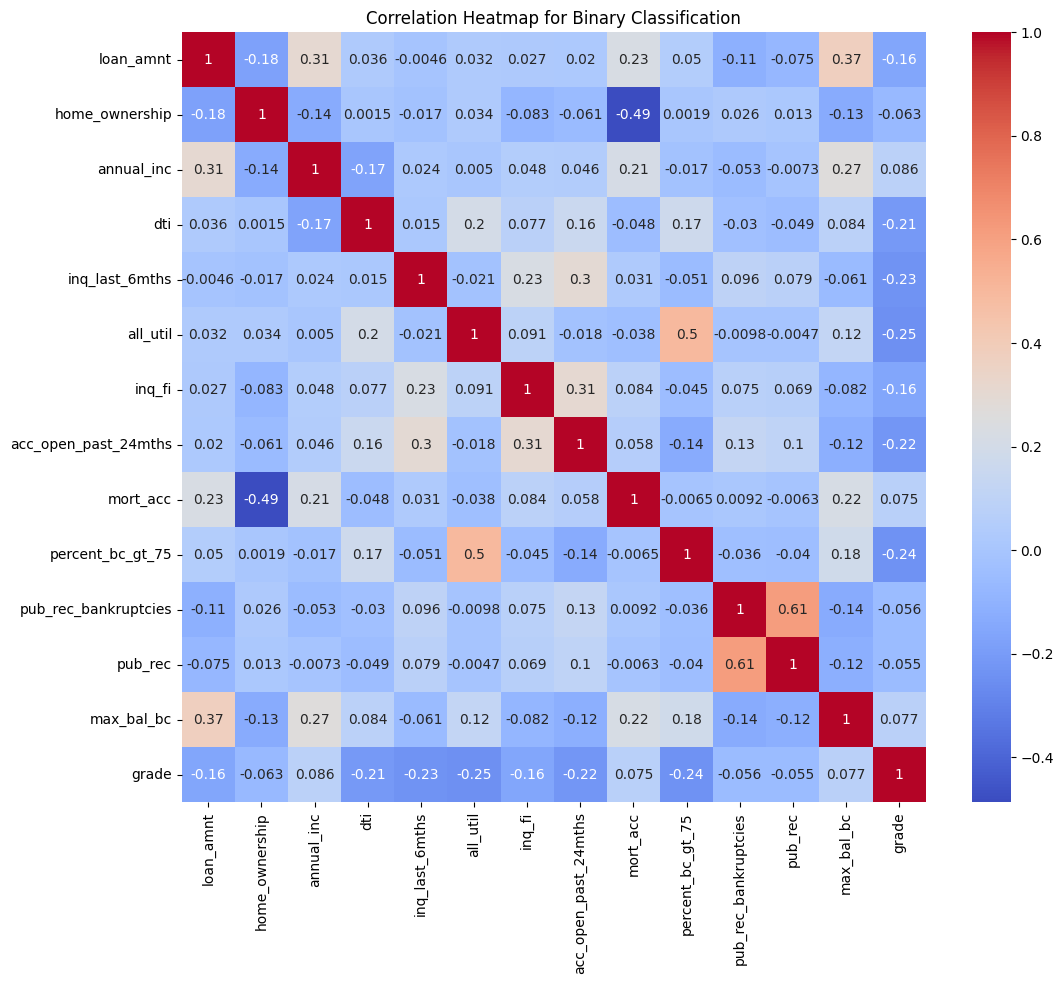

In [11]:
# Looking at the heatmap more closely after dropping columns
# Correlation Heatmap for binary dataframe
correlation_matrix = df_bin.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Binary Classification')
plt.show()

In [12]:
print('Binary Dataframe null counts')
print(df_bin.isnull().sum())

Binary Dataframe null counts
loan_amnt                    0
home_ownership               0
annual_inc                   0
dti                         42
inq_last_6mths               1
all_util                454515
inq_fi                  454498
acc_open_past_24mths         0
mort_acc                     0
percent_bc_gt_75          7943
pub_rec_bankruptcies         0
pub_rec                      0
max_bal_bc              454498
grade                        0
dtype: int64


In [13]:
df_bin.describe()

loan_amnt  home_ownership    annual_inc            dti  \
count  771821.000000   771821.000000  7.718210e+05  771779.000000   
mean    15080.055706        1.882188  7.892841e+04      18.584013   
std      8670.974640        0.935105  7.397617e+04       9.324913   
min      1000.000000        0.000000  0.000000e+00      -1.000000   
25%      8000.000000        1.000000  4.800000e+04      12.130000   
50%     13500.000000        1.000000  6.600000e+04      17.960000   
75%     20000.000000        3.000000  9.500000e+04      24.550000   
max     40000.000000        3.000000  9.573072e+06     999.000000   

       inq_last_6mths       all_util         inq_fi  acc_open_past_24mths  \
count   771820.000000  317306.000000  317323.000000         771821.000000   
mean         0.589003      58.971132       0.934505              4.575129   
std          0.898347      20.446848       1.472738              3.167215   
min          0.000000       0.000000       0.000000              0.000000   
25%          0.000000      45.000000       0.000000              2.000000   
50%          0.000000      60.000000       0.000000              4.000000   
75%          1.000000      74.000000       1.000000              6.000000   
max          6.000000     172.000000      48.000000             56.000000   

            mort_acc  percent_bc_gt_75  pub_rec_bankruptcies        pub_rec  \
count  771821.000000     763878.000000         771821.000000  771821.000000   
mean        1.709132         44.396020              0.130004       0.228294   
std         1.994743         35.965429              0.379622       0.637735   
min         0.000000          0.000000              0.000000       0.000000   
25%         0.000000          9.100000              0.000000       0.000000   
50%         1.000000         40.000000              0.000000       0.000000   
75%         3.000000         75.000000              0.000000       0.000000   
max        61.000000        100.000000             12.000000      63.000000   

          max_bal_bc          grade  
count  317323.000000  771821.000000  
mean     5870.708584       0.640490  
std      5754.793007       0.479857  
min         0.000000       0.000000  
25%      2407.000000       0.000000  
50%      4452.000000       1.000000  
75%      7598.000000       1.000000  
max    776843.000000       1.000000

In [14]:
df_bin.info()


<class 'pandas.core.frame.DataFrame'>
Index: 771821 entries, 2 to 1091128
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             771821 non-null  float64
 1   home_ownership        771821 non-null  int64  
 2   annual_inc            771821 non-null  float64
 3   dti                   771779 non-null  float64
 4   inq_last_6mths        771820 non-null  float64
 5   all_util              317306 non-null  float64
 6   inq_fi                317323 non-null  float64
 7   acc_open_past_24mths  771821 non-null  float64
 8   mort_acc              771821 non-null  float64
 9   percent_bc_gt_75      763878 non-null  float64
 10  pub_rec_bankruptcies  771821 non-null  float64
 11  pub_rec               771821 non-null  float64
 12  max_bal_bc            317323 non-null  float64
 13  grade                 771821 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 88.3 MB


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 1. Handle missing values
# Simple median imputation for minor missing values
df_bin['dti'] = df_bin['dti'].fillna(df_bin['dti'].median())
df_bin['inq_last_6mths'] = df_bin['inq_last_6mths'].fillna(df_bin['inq_last_6mths'].median())
df_bin['percent_bc_gt_75'] = df_bin['percent_bc_gt_75'].fillna(df_bin['percent_bc_gt_75'].median())

# For columns with massive missingness:
# Option A: Drop them if not crucial
df_bin.drop(['all_util', 'inq_fi', 'max_bal_bc'], axis=1, inplace=True)

# Option B: Impute with a model or a more advanced imputation technique
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='median')
# df_bin['all_util'] = imputer.fit_transform(df_bin[['all_util']])
# df_bin['inq_fi'] = imputer.fit_transform(df_bin[['inq_fi']])
# df_bin['max_bal_bc'] = imputer.fit_transform(df_bin[['max_bal_bc']])

# 2. Convert any categorical codes to category dtype
# df_bin['home_ownership'] = df_bin['home_ownership'].astype('category')
# If grade is also categorical, convert it as well:
# df_bin['grade'] = df_bin['grade'].astype('category')

# 3. Outlier handling (based on previous outlier detection methods)
# Suppose we have a boolean mask for outliers: outliers_mask
# df_bin = df_bin[~outliers_mask]

# # 4. Scaling


bin_scale = ['loan_amnt', 'annual_inc', 'dti', 'inq_last_6mths', 'acc_open_past_24mths', 'mort_acc', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'pub_rec']
df_bin[bin_scale] = scaler.fit_transform(df_bin[bin_scale])

# Now df_bin is cleaner, with fewer or no missing values, outliers handled, and features scaled.


/tmp/ipykernel_28372/3556231614.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin['dti'] = df_bin['dti'].fillna(df_bin['dti'].median())
/tmp/ipykernel_28372/3556231614.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin['inq_last_6mths'] = df_bin['inq_last_6mths'].fillna(df_bin['inq_last_6mths'].median())
/tmp/ipykernel_28372/3556231614.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [16]:
df_out = df_bin.copy()

In [17]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

# # Local Outlier Factor
# lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05)
# y_pred_lof = lof.fit_predict(df_out)

# Isolation Forest
iforest = IsolationForest(n_estimators=200, contamination=0.05, random_state=42, n_jobs=-1)
y_pred_if = iforest.fit_predict(df_out)

# Elliptic Envelope
rob_cov = EllipticEnvelope(contamination=0.05, support_fraction=0.9, random_state=42)
rob_cov.fit(df_out)
y_pred_rob = rob_cov.predict(df_out)


/home/mohammed.ati/miniconda/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-8.504174702523107 > -41.087854848634827). You may want to try with a higher value of support_fraction (current value: 0.900).
  warnings.warn(
/home/mohammed.ati/miniconda/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-8.504174702523107 > -41.229053605859441). You may want to try with a higher value of support_fraction (current value: 0.900).
  warnings.warn(
/home/mohammed.ati/miniconda/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-8.504174702523109 > -42.332506396579745). You may want to try with a higher value of support_fraction (curre

In [ ]:
# outliers_lof = (y_pred_lof == -1)
outliers_if = (y_pred_if == -1)
outliers_rob = (y_pred_rob == -1)

# Points that are outliers by at least two methods:
#consensus_outliers = (outliers_lof & outliers_if) | (outliers_lof & outliers_rob) | (outliers_if & outliers_rob)
consensus_outliers = outliers_if&outliers_rob

In [19]:
# Keep only inliers
df_bin_cleaned = df_bin.loc[~consensus_outliers].copy()


In [20]:
print("Number of outliers removed:", consensus_outliers.sum())
print("Remaining data shape:", df_bin_cleaned.shape)


Number of outliers removed: 24135
Remaining data shape: (747686, 11)


In [21]:
df_bin_cleaned.describe()


loan_amnt  home_ownership     annual_inc            dti  \
count  747686.000000   747686.000000  747686.000000  747686.000000   
mean       -0.010800        1.882293      -0.036836       0.008641   
std         0.988845        0.935259       0.684063       0.986362   
min        -1.623816        0.000000      -1.066944      -2.100237   
25%        -0.816524        1.000000      -0.418086      -0.679272   
50%        -0.205289        1.000000      -0.188283      -0.057265   
75%         0.567404        3.000000       0.185487       0.645174   
max         2.873951        3.000000     101.433239     105.142349   

       inq_last_6mths  acc_open_past_24mths       mort_acc  percent_bc_gt_75  \
count   747686.000000         747686.000000  747686.000000     747686.000000   
mean        -0.045092             -0.033016      -0.025437          0.005865   
std          0.924371              0.949479       0.955651          0.999479   
min         -0.655651             -1.444528      -0.856819         -1.239451   
25%         -0.655651             -0.813058      -0.856819         -0.929244   
50%         -0.655651             -0.181588      -0.355501         -0.121589   
75%          0.457505              0.449881       0.647135          0.856539   
max          6.023289             11.184871      24.710404          1.555203   

       pub_rec_bankruptcies        pub_rec          grade  
count         747686.000000  747686.000000  747686.000000  
mean              -0.071376      -0.065790       0.648100  
std                0.800778       0.799142       0.477563  
min               -0.342457      -0.357976       0.000000  
25%               -0.342457      -0.357976       0.000000  
50%               -0.342457      -0.357976       1.000000  
75%               -0.342457      -0.357976       1.000000  
max                4.925941      98.429140       1.000000

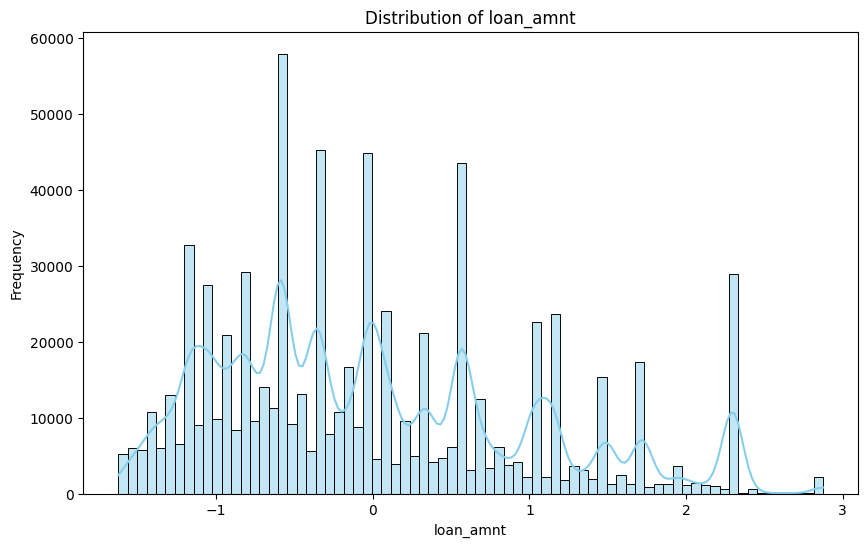

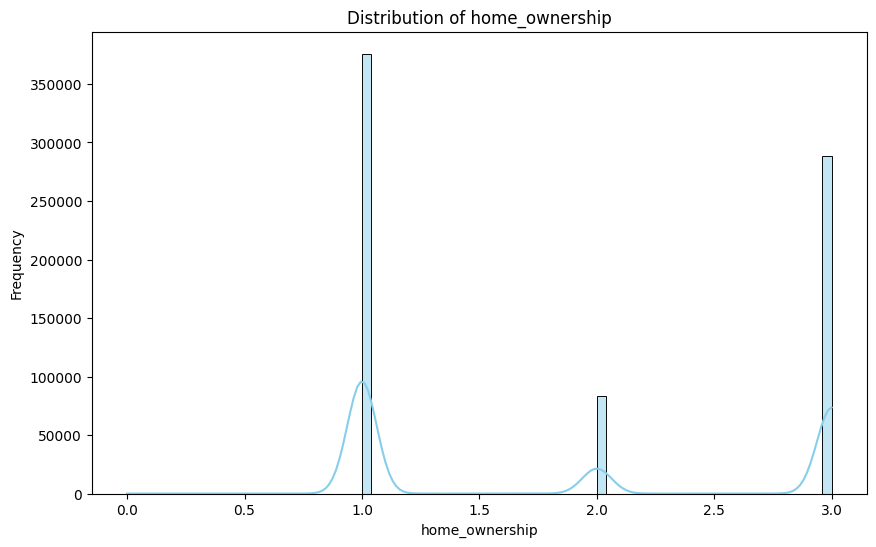

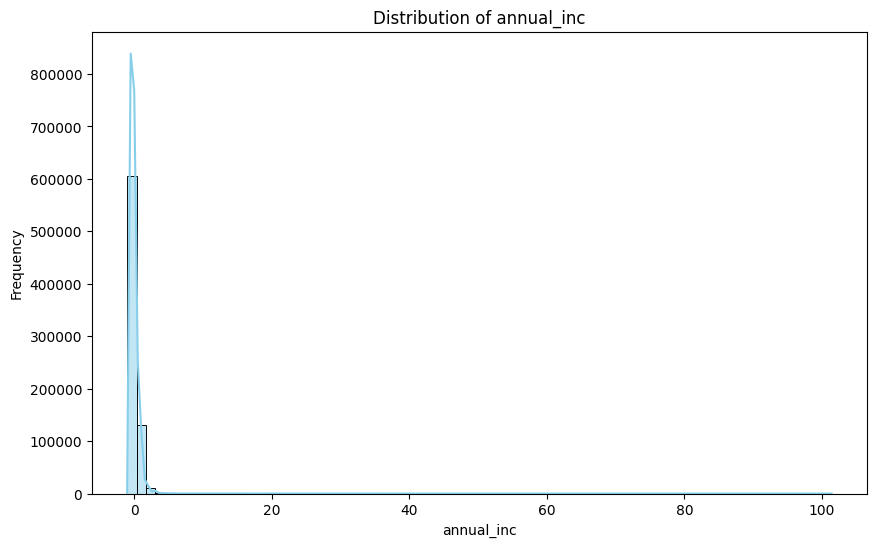

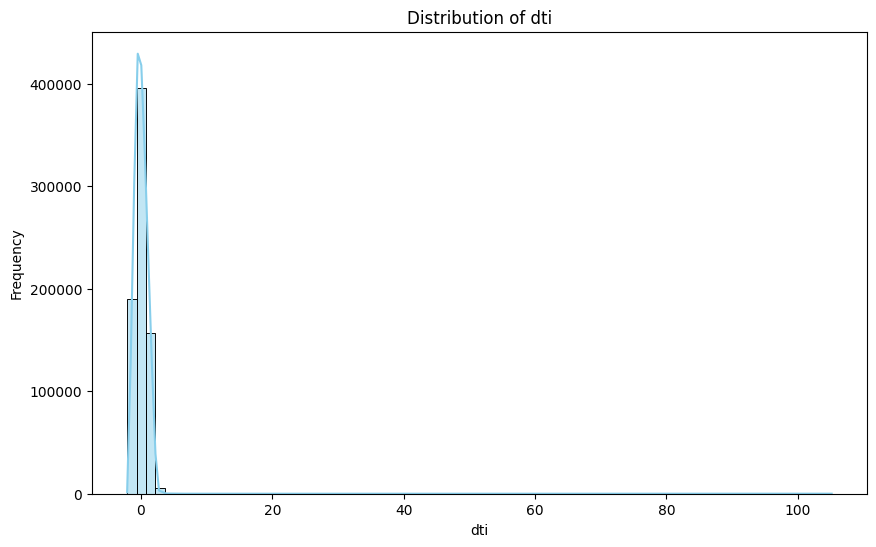

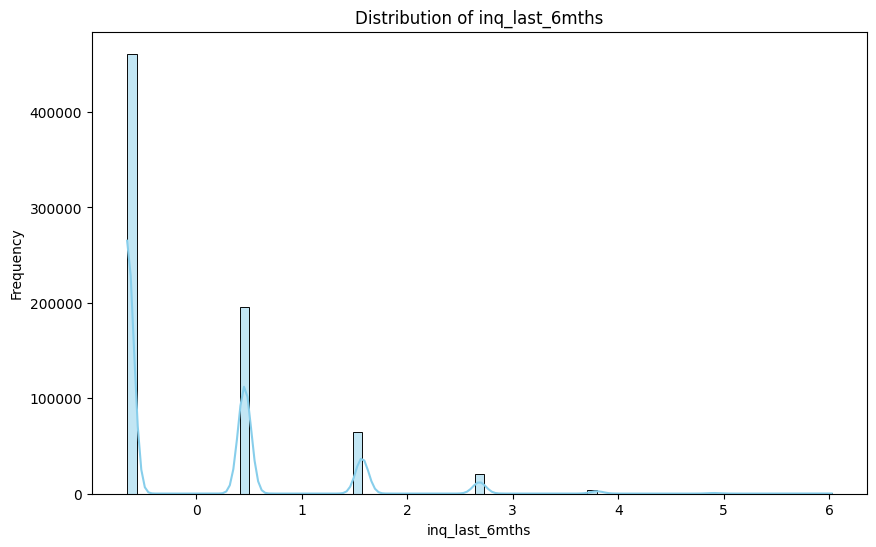

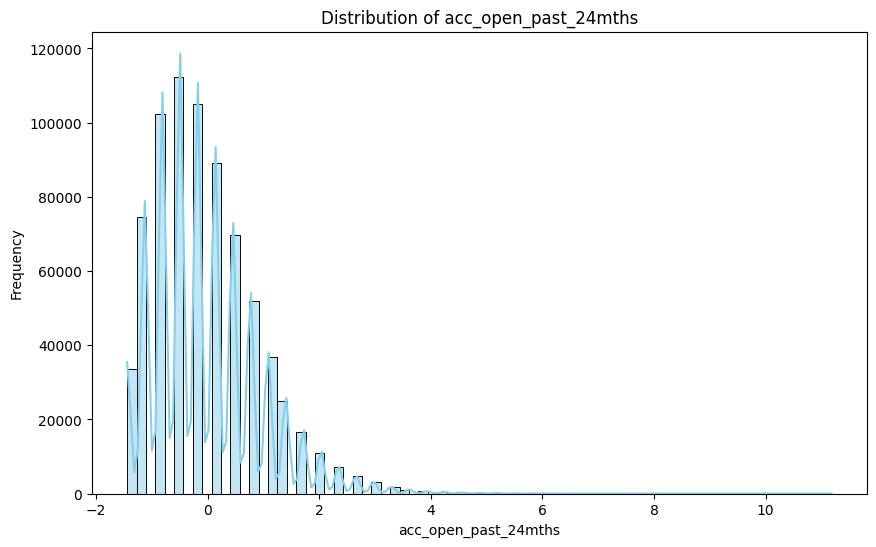

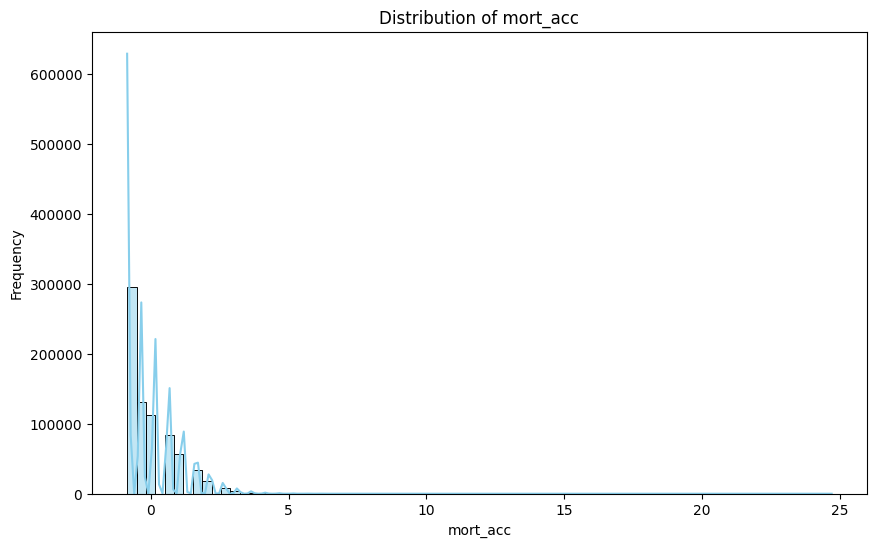

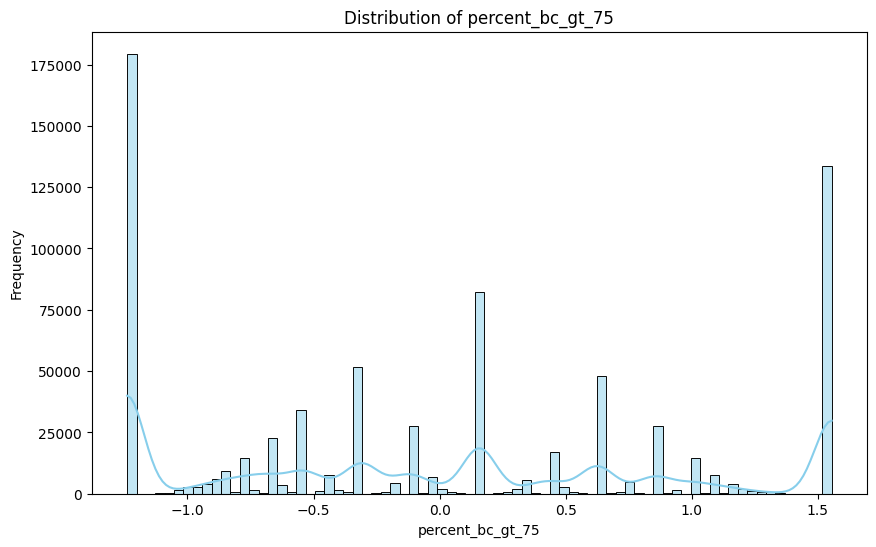

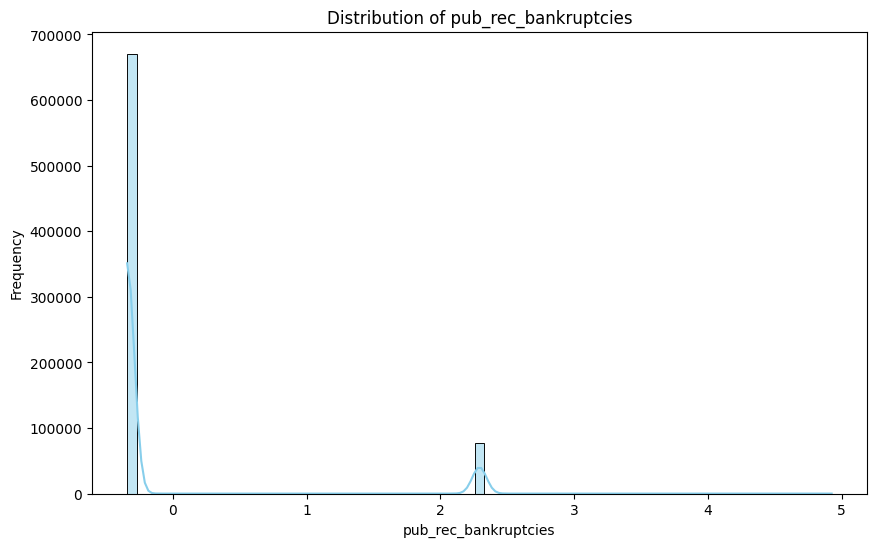

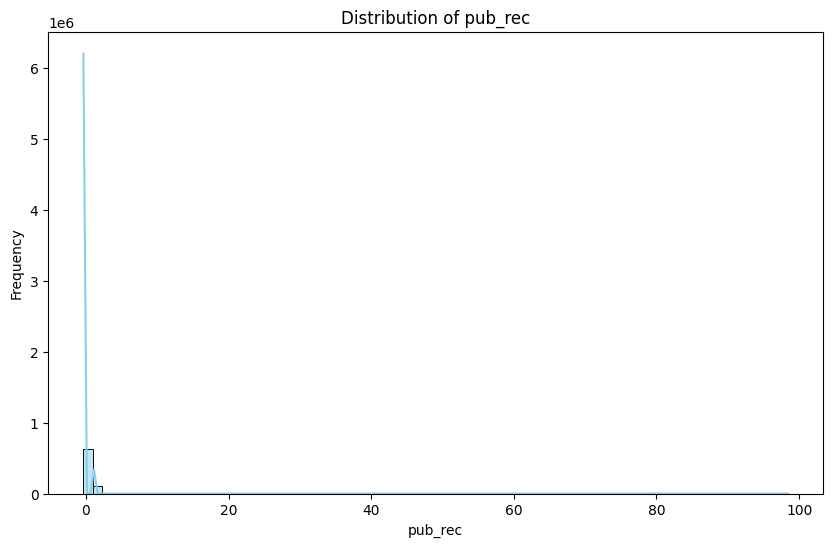

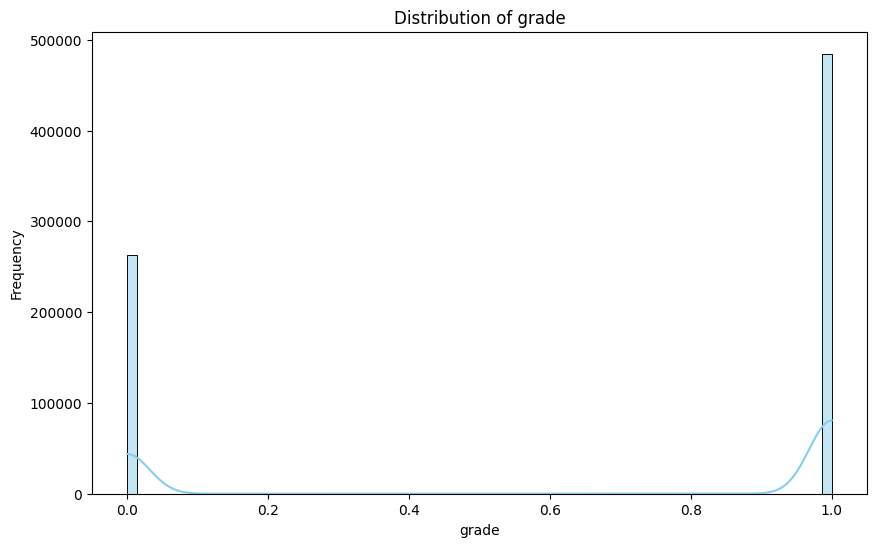

In [22]:
def plot_distribution(data, column, bins=75):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=bins, kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
# Plot distributions
for col in df_bin_cleaned.columns:
    plot_distribution(df_bin_cleaned, col)

In [23]:
# Create a boolean mask for rows where annual_inc or dti exceed 3
mask = (df_bin['annual_inc'] <= 3) & (df_bin['dti'] <= 3)

# Keep only the rows that meet this condition
df_bin_filtered = df_bin[mask].copy()

print("Number of rows removed:", (~mask).sum())
print("Remaining data shape:", df_bin_filtered.shape)

Number of rows removed: 6137
Remaining data shape: (765684, 11)


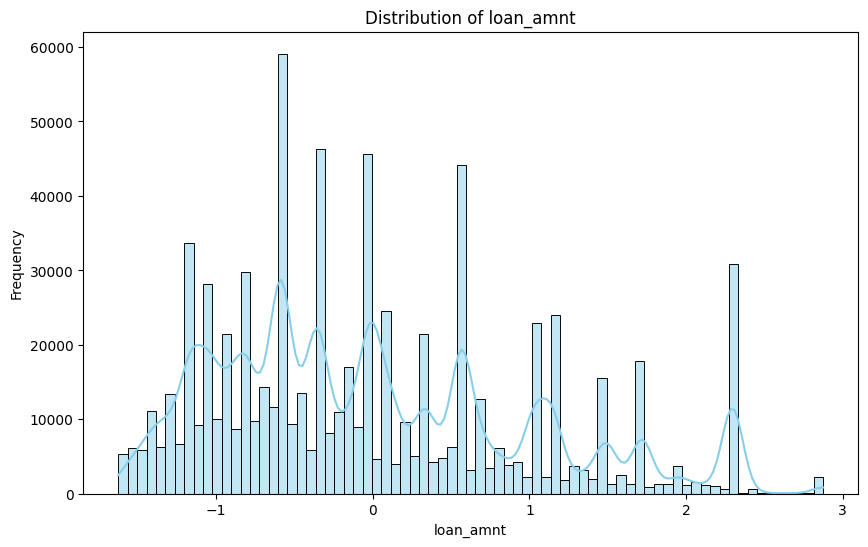

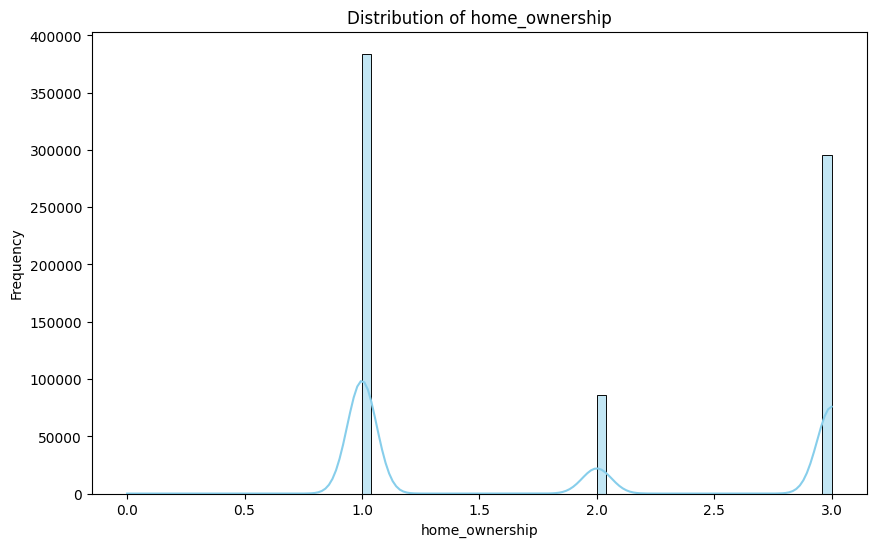

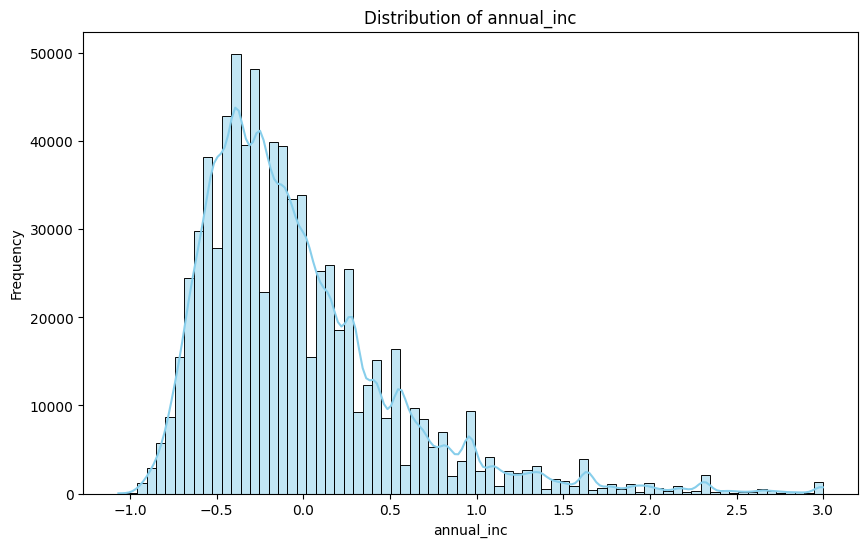

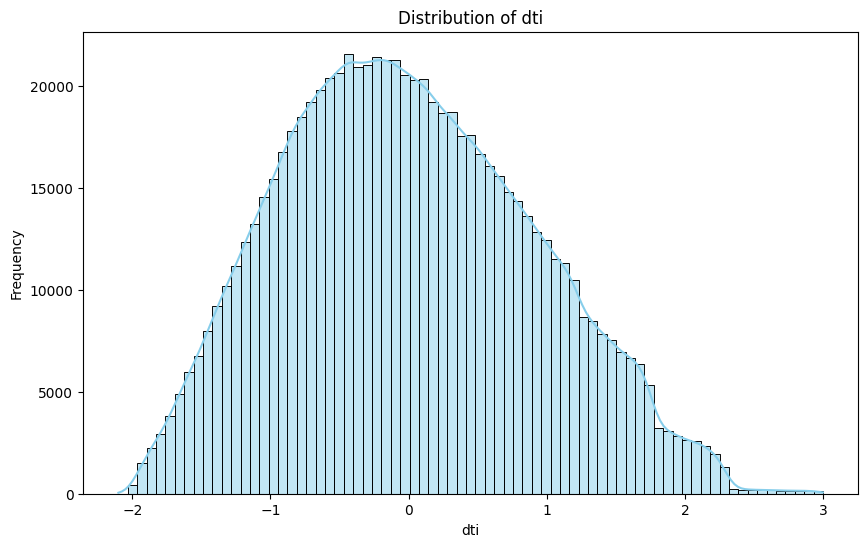

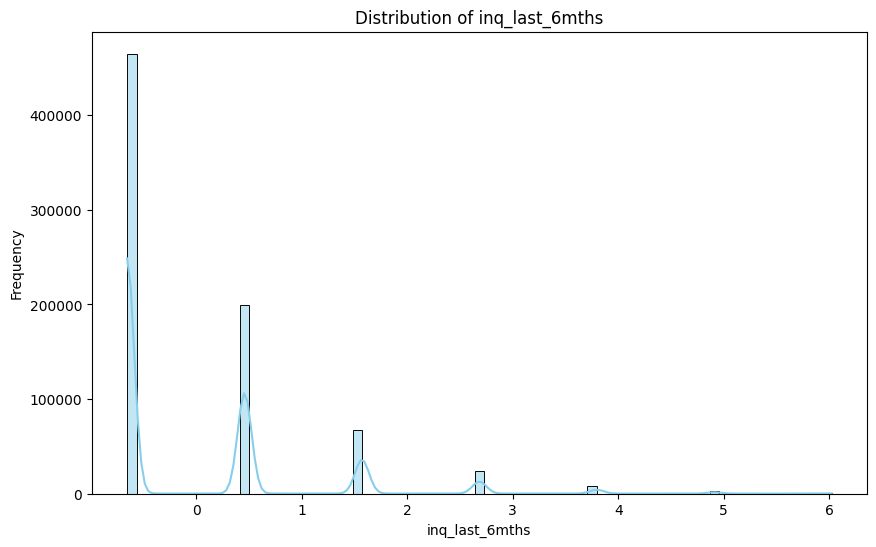

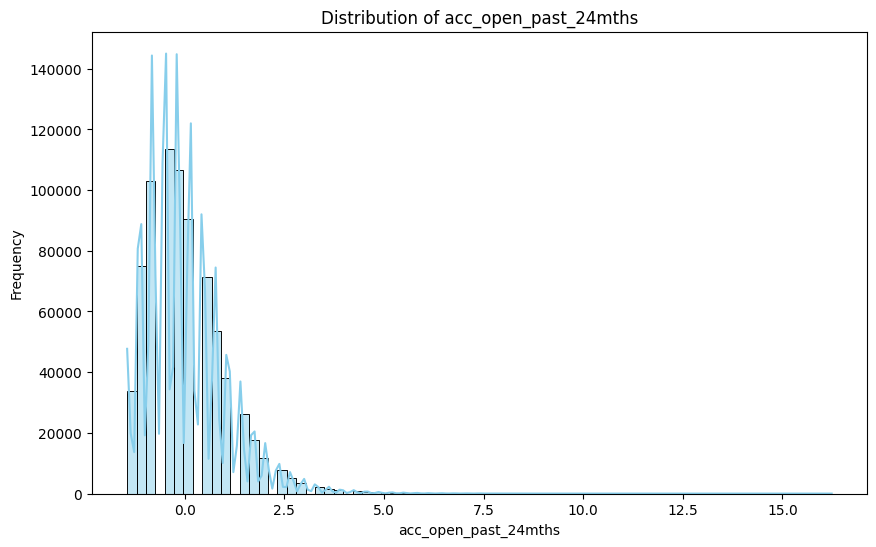

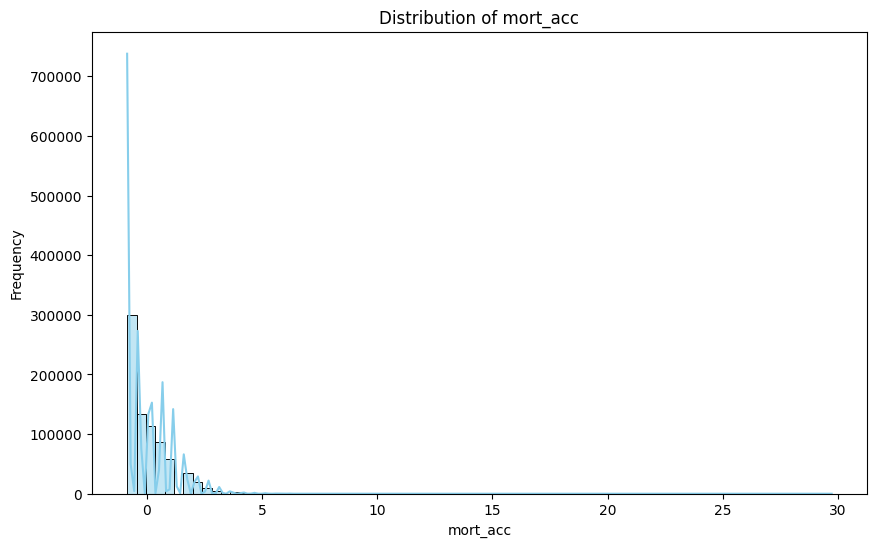

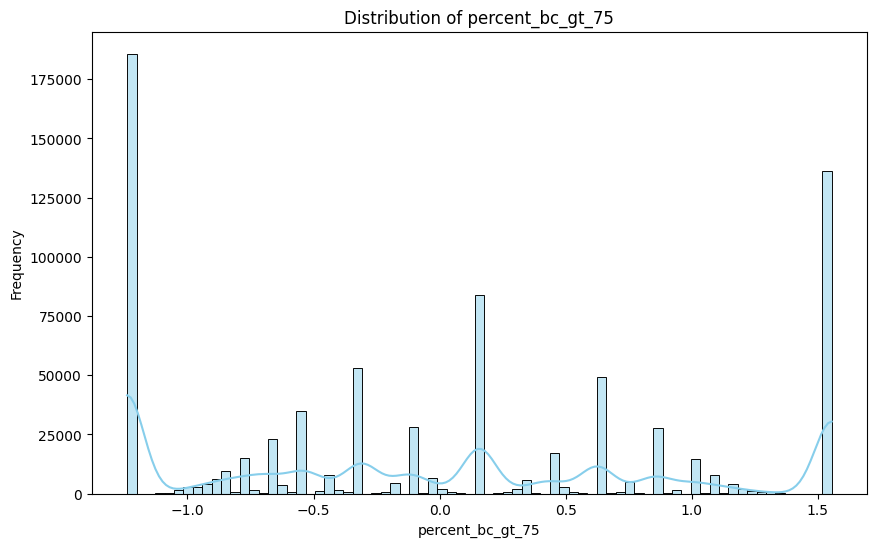

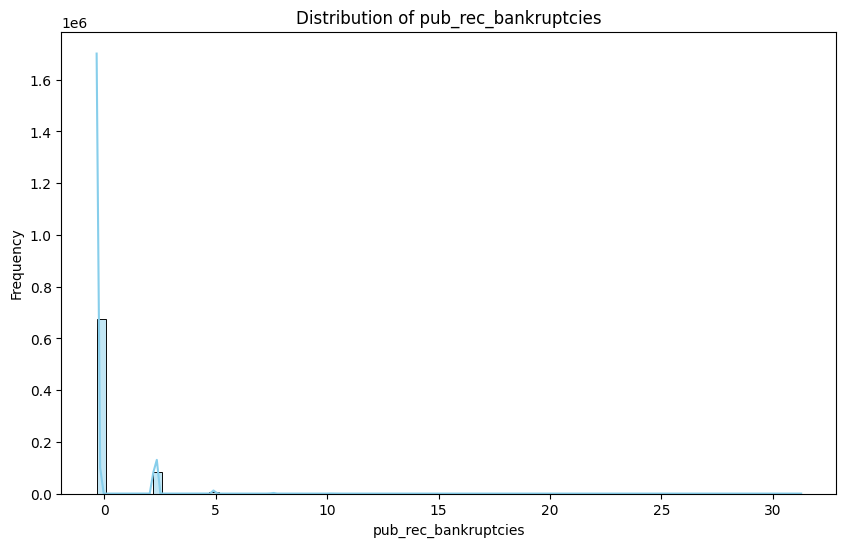

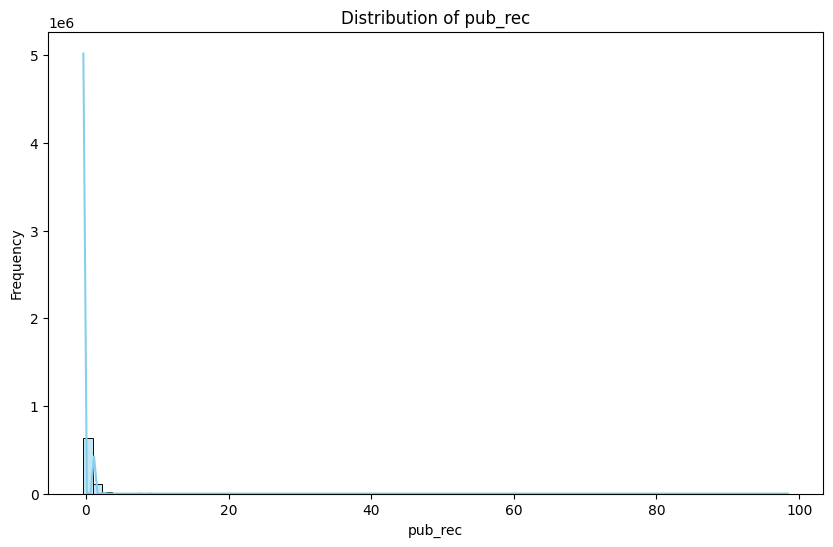

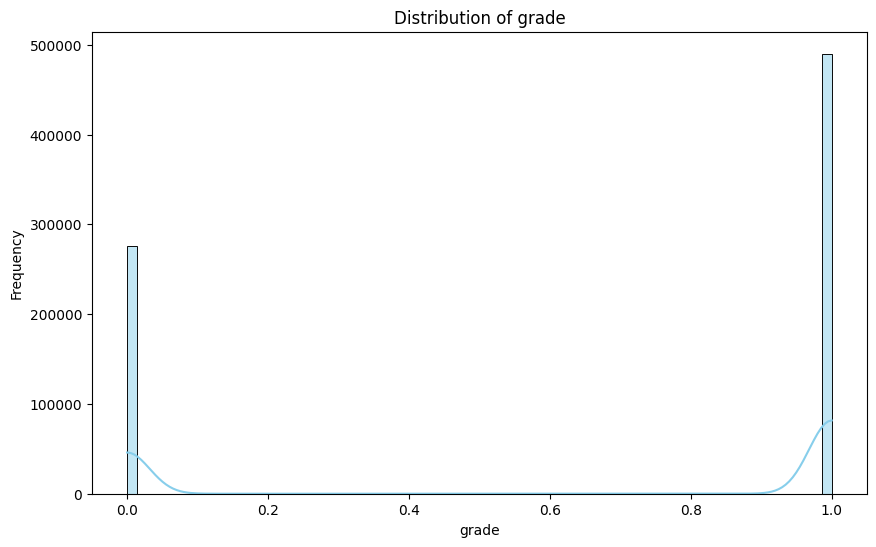

In [24]:
def plot_distribution(data, column, bins=75):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=bins, kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
# Plot distributions
for col in df_bin_filtered.columns:
    plot_distribution(df_bin_filtered, col)

<H1>After removing extreme outliers, we have a normal distribution for annual income and dti.

In [ ]:
df_bin_filtered.head(10)

In [27]:
from sklearn.model_selection import train_test_split

# Creating a Master copy of train-test split for our binary classification.
X_bin = df_bin_filtered.drop(columns = ['grade'])
y_bin = df_bin_filtered['grade']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size = 0.2, random_state = 42)

### KNN CLASSIFIER

KNN Test Accuracy: 0.7500
              precision    recall  f1-score   support

         0.0       0.68      0.57      0.62     55094
         1.0       0.78      0.85      0.81     98043

    accuracy                           0.75    153137
   macro avg       0.73      0.71      0.72    153137
weighted avg       0.74      0.75      0.74    153137



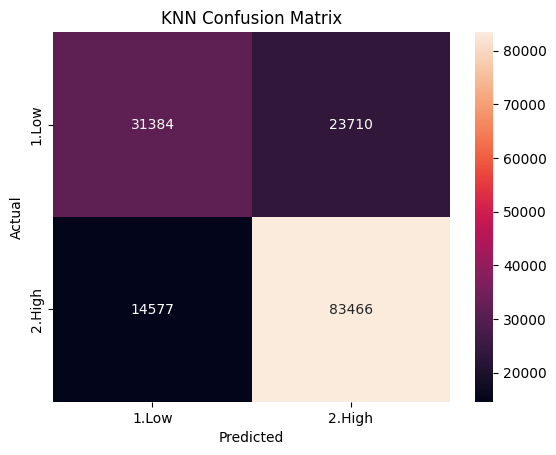

loan_amnt  home_ownership  annual_inc       dti  inq_last_6mths  \
2    0.567404               1   -0.215318 -0.836919       -0.655651   
4   -0.539738               1    0.344768  0.727750        2.683819   
6    0.567404               1    1.366273 -0.419745       -0.655651   
7    0.567404               1    0.082075 -0.104452       -0.655651   
8   -0.585869               3    0.082075 -0.591333        0.457505   
9   -0.816524               1   -0.499194  1.739048       -0.655651   
13   0.336749               3    0.960737 -0.985986        0.457505   
14   1.490023               1    0.176700  0.323446       -0.655651   
15  -0.632000               1   -0.255872  0.413530       -0.655651   
16   1.144041               1    0.406504  0.797458        0.457505   

    acc_open_past_24mths  mort_acc  percent_bc_gt_75  pub_rec_bankruptcies  \
2               0.449881  1.649772          0.157876             -0.342457   
4               1.712821  2.151090          0.437341             -0.342457   
6               0.449881  1.148454          1.555203             -0.342457   
7              -0.181588  0.647135         -1.239451             -0.342457   
8               0.765616 -0.355501         -0.440180              2.291742   
9               0.134146 -0.355501         -0.308831             -0.342457   
13              0.765616  0.145817         -0.839815              2.291742   
14             -1.128793  0.145817         -0.619038             -0.342457   
15             -0.813058 -0.856819          0.624583             -0.342457   
16             -0.813058  0.647135         -0.680520             -0.342457   

     pub_rec  grade  predicted  predicted_prob  
2  -0.357976    1.0        1.0        1.000000  
4  -0.357976    0.0        0.0        0.333333  
6  -0.357976    1.0        1.0        0.888889  
7  -0.357976    1.0        1.0        1.000000  
8   1.210073    1.0        1.0        0.888889  
9  -0.357976    1.0        0.0        0.444444  
13  1.210073    0.0        1.0        0.666667  
14 -0.357976    1.0        1.0        0.777778  
15 -0.357976    1.0        1.0        0.888889  
16 -0.357976    1.0        1.0        1.000000

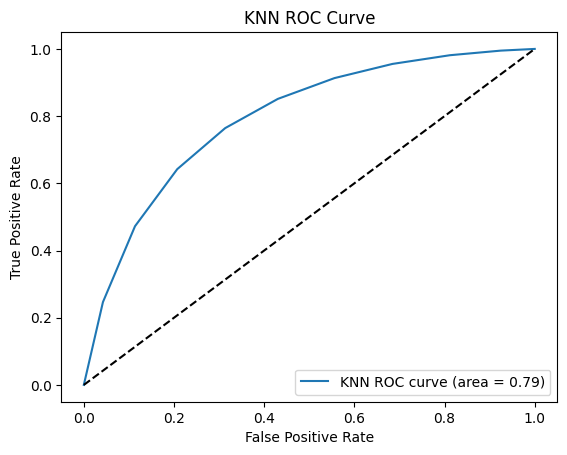

KNN model and DataFrame have been saved to 'knn_package.pkl'.


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Creating a local copy of train-test split for the KNN binary classification model
knn_X_train_bin, knn_X_test_bin, knn_y_train_bin, knn_y_test_bin = X_train_bin, X_test_bin, y_train_bin, y_test_bin

# Creating a local copy of the binary classification dataframe
knn_df_X = X_bin.copy()
knn_df_Y = y_bin.copy()
knn_df = df_bin_filtered.copy()

# Initialize KNN with best parameters
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform')

# Fit the model
knn.fit(knn_X_train_bin, knn_y_train_bin)

# Predict on the test set
knn_y_pred = knn.predict(knn_X_test_bin)

# Compute accuracy
knn_accuracy = accuracy_score(knn_y_test_bin, knn_y_pred)
print(f"KNN Test Accuracy: {knn_accuracy:.4f}")

# Classification report
print(classification_report(knn_y_test_bin, knn_y_pred))

# Confusion matrix
cm = confusion_matrix(knn_y_test_bin, knn_y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['1.Low', '2.High'], yticklabels=['1.Low', '2.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

# Add predictions and probabilities to the DataFrame
knn_df['predicted'] = knn.predict(knn_df_X)
knn_df['predicted_prob'] = knn.predict_proba(knn_df_X)[:, 1]
display(knn_df.head(10))

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(knn_y_test_bin, knn.predict_proba(knn_X_test_bin)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'KNN ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model and DataFrame using pickle
knn_package = {
    'model': knn,
    'dataframe': knn_df
}

with open("knn_package.pkl", "wb") as f:
    pickle.dump(knn_package, f)

print("KNN model and DataFrame have been saved to 'knn_package.pkl'.")


### SGD CLASSIFIER

Accuracy: 0.76
              precision    recall  f1-score   support

         0.0       0.72      0.52      0.60     55094
         1.0       0.77      0.89      0.82     98043

    accuracy                           0.76    153137
   macro avg       0.74      0.70      0.71    153137
weighted avg       0.75      0.76      0.74    153137



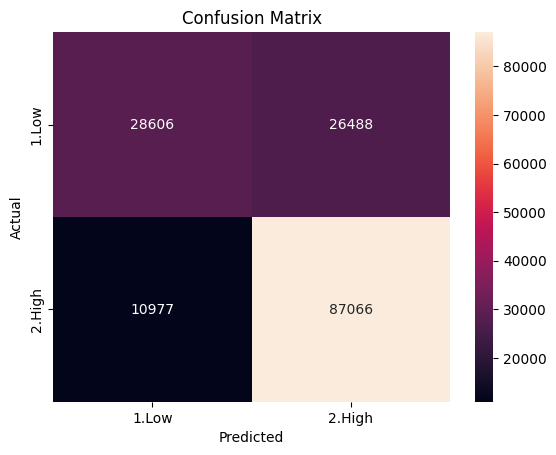

loan_amnt  home_ownership  annual_inc       dti  inq_last_6mths  \
2    0.567404               1   -0.215318 -0.836919       -0.655651   
4   -0.539738               1    0.344768  0.727750        2.683819   
6    0.567404               1    1.366273 -0.419745       -0.655651   
7    0.567404               1    0.082075 -0.104452       -0.655651   
8   -0.585869               3    0.082075 -0.591333        0.457505   
9   -0.816524               1   -0.499194  1.739048       -0.655651   
13   0.336749               3    0.960737 -0.985986        0.457505   
14   1.490023               1    0.176700  0.323446       -0.655651   
15  -0.632000               1   -0.255872  0.413530       -0.655651   
16   1.144041               1    0.406504  0.797458        0.457505   

    acc_open_past_24mths  mort_acc  percent_bc_gt_75  pub_rec_bankruptcies  \
2               0.449881  1.649772          0.157876             -0.342457   
4               1.712821  2.151090          0.437341             -0.342457   
6               0.449881  1.148454          1.555203             -0.342457   
7              -0.181588  0.647135         -1.239451             -0.342457   
8               0.765616 -0.355501         -0.440180              2.291742   
9               0.134146 -0.355501         -0.308831             -0.342457   
13              0.765616  0.145817         -0.839815              2.291742   
14             -1.128793  0.145817         -0.619038             -0.342457   
15             -0.813058 -0.856819          0.624583             -0.342457   
16             -0.813058  0.647135         -0.680520             -0.342457   

     pub_rec  grade  predicted  predicted_prob  
2  -0.357976    1.0        1.0        0.662386  
4  -0.357976    0.0        0.0        0.363486  
6  -0.357976    1.0        1.0        0.863578  
7  -0.357976    1.0        1.0        0.883384  
8   1.210073    1.0        1.0        0.722891  
9  -0.357976    1.0        1.0        0.741683  
13  1.210073    0.0        1.0        0.860240  
14 -0.357976    1.0        1.0        0.801947  
15 -0.357976    1.0        1.0        0.810119  
16 -0.357976    1.0        1.0        0.773102

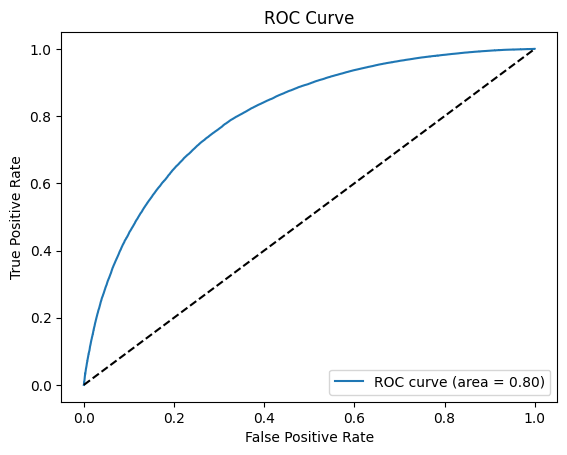

In [34]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Creating a local copy of train-test split for the SGD binary classification model
sgd_X_train_bin, sgd_X_test_bin, sgd_y_train_bin, sgd_y_test_bin = X_train_bin, X_test_bin, y_train_bin, y_test_bin

# Creating a local copy of the binary classification dataframe
sgd_df_X = X_bin.copy()
sgd_df_Y = y_bin.copy()
sgd_df = df_bin_filtered.copy()

# Initialize and fit the SGD model
sgd = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(sgd_X_train_bin, sgd_y_train_bin)

# Predict on the test set
sgd_y_pred = sgd.predict(sgd_X_test_bin)

# Evaluate the model
accuracy = accuracy_score(sgd_y_test_bin, sgd_y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(sgd_y_test_bin, sgd_y_pred))

# Confusion matrix
cm = confusion_matrix(sgd_y_test_bin, sgd_y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['1.Low', '2.High'], yticklabels=['1.Low', '2.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Add predictions and probabilities to the DataFrame
sgd_df['predicted'] = sgd.predict(sgd_df_X)
sgd_df['predicted_prob'] = sgd.predict_proba(sgd_df_X)[:, 1]
display(sgd_df.head(10))

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(sgd_y_test_bin, sgd.predict_proba(sgd_X_test_bin)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model and DataFrame using pickle
sgd_package = {
    'model': sgd,
    'dataframe': sgd_df
}

with open("sgd_package.pkl", "wb") as f:
    pickle.dump(sgd_package, f)


### RANDOM FOREST CLASSIFIER

Random Forest Accuracy: 0.7755996264782515
              precision    recall  f1-score   support

         0.0       0.71      0.63      0.67     55094
         1.0       0.80      0.86      0.83     98043

    accuracy                           0.78    153137
   macro avg       0.76      0.74      0.75    153137
weighted avg       0.77      0.78      0.77    153137



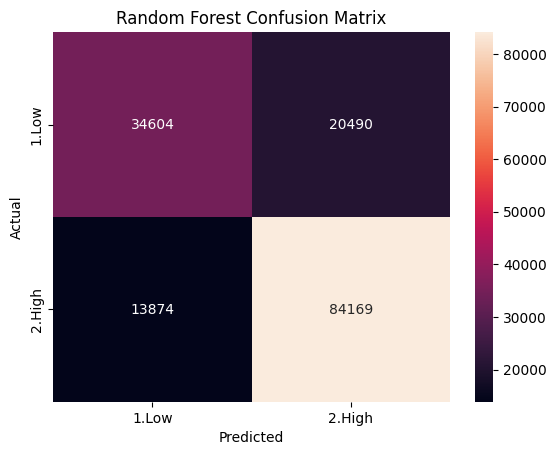

loan_amnt  home_ownership  annual_inc       dti  inq_last_6mths  \
2    0.567404               1   -0.215318 -0.836919       -0.655651   
4   -0.539738               1    0.344768  0.727750        2.683819   
6    0.567404               1    1.366273 -0.419745       -0.655651   
7    0.567404               1    0.082075 -0.104452       -0.655651   
8   -0.585869               3    0.082075 -0.591333        0.457505   
9   -0.816524               1   -0.499194  1.739048       -0.655651   
13   0.336749               3    0.960737 -0.985986        0.457505   
14   1.490023               1    0.176700  0.323446       -0.655651   
15  -0.632000               1   -0.255872  0.413530       -0.655651   
16   1.144041               1    0.406504  0.797458        0.457505   

    acc_open_past_24mths  mort_acc  percent_bc_gt_75  pub_rec_bankruptcies  \
2               0.449881  1.649772          0.157876             -0.342457   
4               1.712821  2.151090          0.437341             -0.342457   
6               0.449881  1.148454          1.555203             -0.342457   
7              -0.181588  0.647135         -1.239451             -0.342457   
8               0.765616 -0.355501         -0.440180              2.291742   
9               0.134146 -0.355501         -0.308831             -0.342457   
13              0.765616  0.145817         -0.839815              2.291742   
14             -1.128793  0.145817         -0.619038             -0.342457   
15             -0.813058 -0.856819          0.624583             -0.342457   
16             -0.813058  0.647135         -0.680520             -0.342457   

     pub_rec  grade  predicted  predicted_prob  
2  -0.357976    1.0        1.0            0.76  
4  -0.357976    0.0        0.0            0.11  
6  -0.357976    1.0        1.0            0.96  
7  -0.357976    1.0        1.0            0.99  
8   1.210073    1.0        1.0            0.94  
9  -0.357976    1.0        1.0            0.92  
13  1.210073    0.0        1.0            0.79  
14 -0.357976    1.0        1.0            0.99  
15 -0.357976    1.0        1.0            0.99  
16 -0.357976    1.0        1.0            1.00

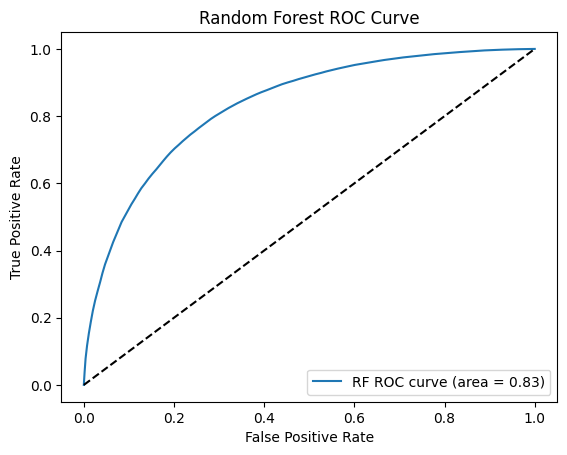

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Creating a local copy of train-test split for the RF binary classification model
rf_X_train_bin, rf_X_test_bin, rf_y_train_bin, rf_y_test_bin = X_train_bin, X_test_bin, y_train_bin, y_test_bin

# Creating a local copy of the binary classification dataframe
rf_df_X = X_bin.copy()
rf_df_Y = y_bin.copy()
rf_df = df_bin_filtered.copy()

# Initialize RandomForestClassifier with parallelization
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

# Fit the model
rf.fit(rf_X_train_bin, rf_y_train_bin)

# Predict on the test set
rf_y_pred = rf.predict(rf_X_test_bin)

# Compute accuracy
rf_accuracy = accuracy_score(rf_y_test_bin, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Classification report
print(classification_report(rf_y_test_bin, rf_y_pred))

# Confusion matrix
rf_cm = confusion_matrix(rf_y_test_bin, rf_y_pred)

# Plot confusion matrix
sns.heatmap(rf_cm, annot=True, fmt="d", xticklabels=['1.Low', '2.High'], yticklabels=['1.Low', '2.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Add predictions and probabilities to the DataFrame
rf_df['predicted'] = rf.predict(rf_df_X)
rf_df['predicted_prob'] = rf.predict_proba(rf_df_X)[:, 1]
display(rf_df.head(10))

# Plotting the ROC curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(rf_y_test_bin, rf.predict_proba(rf_X_test_bin)[:, 1], pos_label=1)
rf_roc_auc = auc(rf_fpr, rf_tpr)

plt.plot(rf_fpr, rf_tpr, label=f'RF ROC curve (area = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model and DataFrame using pickle
rf_package = {
    'model': rf,
    'dataframe': rf_df
}

with open("rf_package.pkl", "wb") as f:
    pickle.dump(rf_package, f)


### GBT CLASSIFIER

Gradient Boosted Trees Test Accuracy: 0.7987096521415464
              precision    recall  f1-score   support

         0.0       0.76      0.65      0.70     55094
         1.0       0.82      0.88      0.85     98043

    accuracy                           0.80    153137
   macro avg       0.79      0.77      0.77    153137
weighted avg       0.80      0.80      0.79    153137



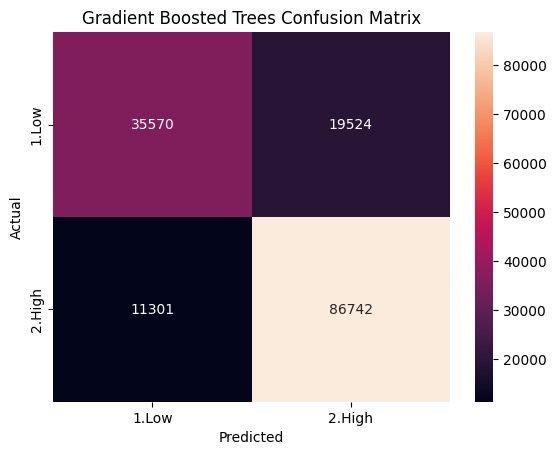

loan_amnt  home_ownership  annual_inc       dti  inq_last_6mths  \
2    0.567404               1   -0.215318 -0.836919       -0.655651   
4   -0.539738               1    0.344768  0.727750        2.683819   
6    0.567404               1    1.366273 -0.419745       -0.655651   
7    0.567404               1    0.082075 -0.104452       -0.655651   
8   -0.585869               3    0.082075 -0.591333        0.457505   
9   -0.816524               1   -0.499194  1.739048       -0.655651   
13   0.336749               3    0.960737 -0.985986        0.457505   
14   1.490023               1    0.176700  0.323446       -0.655651   
15  -0.632000               1   -0.255872  0.413530       -0.655651   
16   1.144041               1    0.406504  0.797458        0.457505   

    acc_open_past_24mths  mort_acc  percent_bc_gt_75  pub_rec_bankruptcies  \
2               0.449881  1.649772          0.157876             -0.342457   
4               1.712821  2.151090          0.437341             -0.342457   
6               0.449881  1.148454          1.555203             -0.342457   
7              -0.181588  0.647135         -1.239451             -0.342457   
8               0.765616 -0.355501         -0.440180              2.291742   
9               0.134146 -0.355501         -0.308831             -0.342457   
13              0.765616  0.145817         -0.839815              2.291742   
14             -1.128793  0.145817         -0.619038             -0.342457   
15             -0.813058 -0.856819          0.624583             -0.342457   
16             -0.813058  0.647135         -0.680520             -0.342457   

     pub_rec  grade  predicted  predicted_prob  
2  -0.357976    1.0        1.0        0.709188  
4  -0.357976    0.0        0.0        0.280715  
6  -0.357976    1.0        1.0        0.809172  
7  -0.357976    1.0        1.0        0.959670  
8   1.210073    1.0        1.0        0.836674  
9  -0.357976    1.0        1.0        0.823583  
13  1.210073    0.0        1.0        0.735892  
14 -0.357976    1.0        1.0        0.964508  
15 -0.357976    1.0        1.0        0.930012  
16 -0.357976    1.0        1.0        0.949326

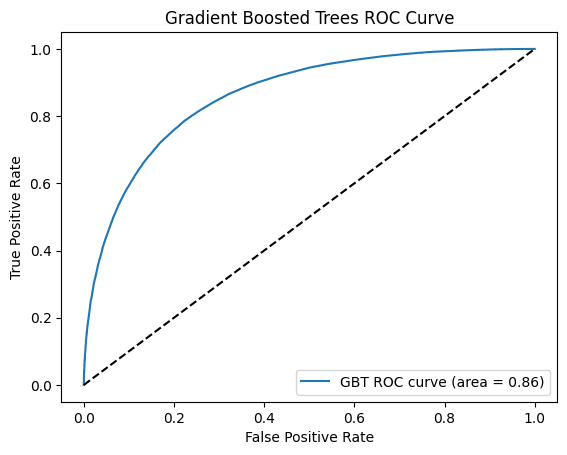

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Creating a local copy of train-test split for the GBT binary classification model
gbt_X_train_bin, gbt_X_test_bin, gbt_y_train_bin, gbt_y_test_bin = X_train_bin, X_test_bin, y_train_bin, y_test_bin

# Creating a local copy of the binary classification dataframe
gbt_df_X = X_bin.copy()
gbt_df_Y = y_bin.copy()
gbt_df = df_bin_filtered.copy()

# Initialize Gradient Boosting Classifier with the best parameters
gbt_best_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Fit the model
gbt_best_model.fit(gbt_X_train_bin, gbt_y_train_bin)

# Predict on the test set
gbt_y_pred = gbt_best_model.predict(gbt_X_test_bin)

# Compute accuracy
gbt_accuracy = accuracy_score(gbt_y_test_bin, gbt_y_pred)
print("Gradient Boosted Trees Test Accuracy:", gbt_accuracy)

# Classification report
print(classification_report(gbt_y_test_bin, gbt_y_pred))

# Confusion matrix
gbt_cm = confusion_matrix(gbt_y_test_bin, gbt_y_pred)

# Plot confusion matrix
sns.heatmap(gbt_cm, annot=True, fmt="d", xticklabels=['1.Low', '2.High'], yticklabels=['1.Low', '2.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosted Trees Confusion Matrix')
plt.show()

# Add predictions and probabilities to the DataFrame
gbt_df['predicted'] = gbt_best_model.predict(gbt_df_X)
gbt_df['predicted_prob'] = gbt_best_model.predict_proba(gbt_df_X)[:, 1]
display(gbt_df.head(10))

# Plotting the ROC curve
gbt_fpr, gbt_tpr, gbt_thresholds = roc_curve(gbt_y_test_bin, gbt_best_model.predict_proba(gbt_X_test_bin)[:, 1], pos_label=1)
gbt_roc_auc = auc(gbt_fpr, gbt_tpr)

plt.plot(gbt_fpr, gbt_tpr, label=f'GBT ROC curve (area = {gbt_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosted Trees ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model and DataFrame using pickle
gbt_package = {
    'model': gbt_best_model,
    'dataframe': gbt_df
}

with open("gbt_package.pkl", "wb") as f:
    pickle.dump(gbt_package, f)


### XGB CLASSIFIER

/home/mohammed.ati/miniconda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:24:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Test Accuracy: 0.7952421687769775
              precision    recall  f1-score   support

         0.0       0.75      0.65      0.69     55094
         1.0       0.82      0.88      0.85     98043

    accuracy                           0.80    153137
   macro avg       0.78      0.76      0.77    153137
weighted avg       0.79      0.80      0.79    153137



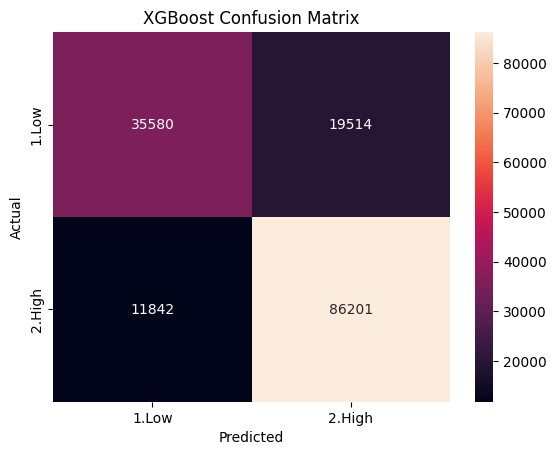

loan_amnt  home_ownership  annual_inc       dti  inq_last_6mths  \
2    0.567404               1   -0.215318 -0.836919       -0.655651   
4   -0.539738               1    0.344768  0.727750        2.683819   
6    0.567404               1    1.366273 -0.419745       -0.655651   
7    0.567404               1    0.082075 -0.104452       -0.655651   
8   -0.585869               3    0.082075 -0.591333        0.457505   
9   -0.816524               1   -0.499194  1.739048       -0.655651   
13   0.336749               3    0.960737 -0.985986        0.457505   
14   1.490023               1    0.176700  0.323446       -0.655651   
15  -0.632000               1   -0.255872  0.413530       -0.655651   
16   1.144041               1    0.406504  0.797458        0.457505   

    acc_open_past_24mths  mort_acc  percent_bc_gt_75  pub_rec_bankruptcies  \
2               0.449881  1.649772          0.157876             -0.342457   
4               1.712821  2.151090          0.437341             -0.342457   
6               0.449881  1.148454          1.555203             -0.342457   
7              -0.181588  0.647135         -1.239451             -0.342457   
8               0.765616 -0.355501         -0.440180              2.291742   
9               0.134146 -0.355501         -0.308831             -0.342457   
13              0.765616  0.145817         -0.839815              2.291742   
14             -1.128793  0.145817         -0.619038             -0.342457   
15             -0.813058 -0.856819          0.624583             -0.342457   
16             -0.813058  0.647135         -0.680520             -0.342457   

     pub_rec  grade  predicted  predicted_prob  
2  -0.357976    1.0          1        0.723226  
4  -0.357976    0.0          0        0.217525  
6  -0.357976    1.0          1        0.800227  
7  -0.357976    1.0          1        0.962777  
8   1.210073    1.0          1        0.879269  
9  -0.357976    1.0          1        0.849251  
13  1.210073    0.0          1        0.756763  
14 -0.357976    1.0          1        0.975861  
15 -0.357976    1.0          1        0.927211  
16 -0.357976    1.0          1        0.962381

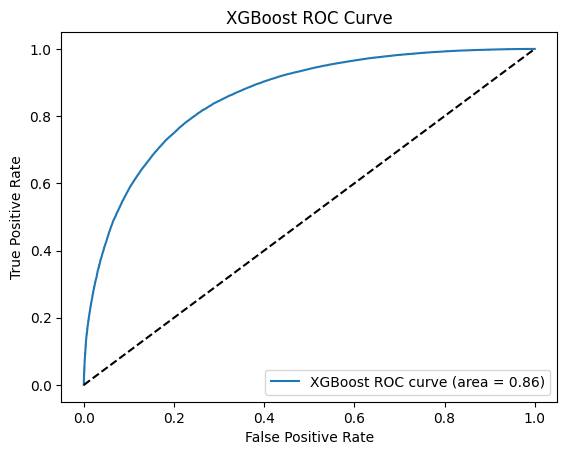

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Creating a local copy of train-test split for the XGB binary classification model
xgb_X_train_bin, xgb_X_test_bin, xgb_y_train_bin, xgb_y_test_bin = X_train_bin, X_test_bin, y_train_bin, y_test_bin

# Creating a local copy of the binary classification dataframe
xgb_df_X = X_bin.copy()
xgb_df_Y = y_bin.copy()
xgb_df = df_bin_filtered.copy()

# Initialize XGBClassifier with the best parameters
xgb_best_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=7,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb_best_model.fit(xgb_X_train_bin, xgb_y_train_bin)

# Predict on the test set
xgb_y_pred = xgb_best_model.predict(xgb_X_test_bin)

# Compute accuracy
xgb_accuracy = accuracy_score(xgb_y_test_bin, xgb_y_pred)
print("XGBoost Test Accuracy:", xgb_accuracy)

# Classification report
print(classification_report(xgb_y_test_bin, xgb_y_pred))

# Confusion matrix
xgb_cm = confusion_matrix(xgb_y_test_bin, xgb_y_pred)

# Plot confusion matrix
sns.heatmap(xgb_cm, annot=True, fmt="d", xticklabels=['1.Low', '2.High'], yticklabels=['1.Low', '2.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Add predictions and probabilities to the DataFrame
xgb_df['predicted'] = xgb_best_model.predict(xgb_df_X)
xgb_df['predicted_prob'] = xgb_best_model.predict_proba(xgb_df_X)[:, 1]
display(xgb_df.head(10))

# Plotting the ROC curve
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(xgb_y_test_bin, xgb_best_model.predict_proba(xgb_X_test_bin)[:, 1], pos_label=1)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost ROC curve (area = {xgb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model and DataFrame using pickle
xgb_package = {
    'model': xgb_best_model,
    'dataframe': xgb_df
}

with open("xgb_package.pkl", "wb") as f:
    pickle.dump(xgb_package, f)


### UNPICKLING THE MODEL AND THE DATAFRAME

In [7]:
import pickle

# List of file names and model variable names
model_files = {
    "rf_package.pkl": "Random Forest",
    "gbt_package.pkl": "Gradient Boosted Trees",
    "xgb_package.pkl": "XGBoost",
    "knn_package.pkl": "K-Nearest Neighbors",
    "sgd_package.pkl": "Stochastic Gradient Descent"
}

loaded_models = {}

# Load all models and DataFrames
for file_name, model_name in model_files.items():
    try:
        with open(file_name, "rb") as f:
            package = pickle.load(f)
            loaded_models[model_name] = {
                "model": package['model'],
                "dataframe": package['dataframe']
            }
            print(f"{model_name} model and DataFrame loaded successfully.")
    except Exception as e:
        print(f"Error loading {model_name} from {file_name}: {e}")

# Access and verify the contents of the loaded models
for model_name, content in loaded_models.items():
    match(model_name):
        case "Random Forest":
            rf_df = content['dataframe']
            rf = content['model']
        case "Gradient Boosted Trees":
            gbt_df = content['dataframe']
            gbt_best_model = content['model']
        case "XGBoost":
            xgb_df = content['dataframe']
            xgb_best_model = content['model']
        case "K-Nearest Neighbors":
            knn_df = content['dataframe']
            knn = content['model']
        case "Stochastic Gradient Descent":
            sgd_df = content['dataframe']
            sgd = content['model']
        case _:
            print("Something went wrong while")

    print(f"\nModel: {model_name}")
    print(f"Type: {type(content['model'])}")
    print(f"DataFrame preview:\n{content['dataframe'].head()}")


Random Forest model and DataFrame loaded successfully.
Gradient Boosted Trees model and DataFrame loaded successfully.
XGBoost model and DataFrame loaded successfully.
K-Nearest Neighbors model and DataFrame loaded successfully.
Stochastic Gradient Descent model and DataFrame loaded successfully.

Model: Random Forest
Type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
DataFrame preview:
   loan_amnt  home_ownership  annual_inc       dti  inq_last_6mths  \
2   0.567404               1   -0.215318 -0.836919       -0.655651   
4  -0.539738               1    0.344768  0.727750        2.683819   
6   0.567404               1    1.366273 -0.419745       -0.655651   
7   0.567404               1    0.082075 -0.104452       -0.655651   
8  -0.585869               3    0.082075 -0.591333        0.457505   

   acc_open_past_24mths  mort_acc  percent_bc_gt_75  pub_rec_bankruptcies  \
2              0.449881  1.649772          0.157876             -0.342457   
4              1.71282

### LIME AND SHAP EXPLORATION FOR TEXT EXPLANATIONS

In [3]:
import lime
import lime.lime_tabular
import shap
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from transformers import pipeline
import torch
import tensorflow as tf
from huggingface_hub import login
from collections import defaultdict

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

2024-12-11 14:45:49.964669: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-11 14:45:49.983543: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733946349.999888  172494 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733946350.004796  172494 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-11 14:45:50.022826: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [ ]:
# Logging into the HuggingFace platform
login("secret Key")

# Creating an instance of the Google Gemma Model.
pipe = pipeline("text-generation", model="google/gemma-2-2b-it")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cpu


### EXPLAINABILITY PIPELINE

In [5]:
# Creating a pipeline function for SHAP and LIME
def feature_explainer(df, model, model_name, pipe, sample_size = 10):
    df = df.sample(n=sample_size, random_state=42)

    # Print the data sample for understanding
    print(f"Display sampled data for {model_name}")
    display(df)

    #grade_prediction to model_predictions
    X = df.drop(columns=['grade','predicted', 'predicted_prob'])
    Y = df[['grade']]
    Y_pred = df[['predicted']]

    # Defining a function to generate the Lime and SHAP explanations
    def generate_explanations(instance, model, explainer_lime, explainer_shap, feature_names):
        # LIME Explanation
        exp_lime = explainer_lime.explain_instance(
            data_row=instance,
            predict_fn=model.predict_proba,
            num_features=len(feature_names)
        )
        lime_features = exp_lime.as_list()
        lime_df = pd.DataFrame(lime_features, columns=['Feature', 'LIME Weight'])

        # SHAP Explanation
        shap_values = explainer_shap(instance.reshape(1, -1))
        shap_values_dense = shap_values.values.flatten()
        shap_df = pd.DataFrame({
            'Feature': feature_names,
            'SHAP Value': shap_values_dense
        })

        # Merge LIME and SHAP explanations
        explanation_df = pd.merge(lime_df, shap_df, on='Feature', how='outer').fillna(0)

        return explanation_df

    # Select the subset of data you want to explain (e.g., test set)
    feature_names = X.columns.tolist()

    # Convert to NumPy array
    X_explain_numpy = X.to_numpy()

    # Initialize a list to store explanations
    explanations = []

    # lime explainer
    explainer_lime = lime.lime_tabular.LimeTabularExplainer(
        X.to_numpy(),
        feature_names=X.columns.to_list(),
        class_names=[1.0, 0.0],
        mode='classification'
    )

    # shap explainer
    explainer_shap = shap.Explainer(model, X)

    # Global Explanation
    print("Visualizing global feature explanations with Lime and SHAP")
    shap.summary_plot(explainer_shap(X), X)

    def plot_lime_global(explainer_lime, X, model, num_samples=10):
        # Dictionary to aggregate feature weights
        lime_feature_weights = defaultdict(float)

        # Generate explanations for a subset of the data
        for i in range(num_samples):
            explanation = explainer_lime.explain_instance(X.iloc[i].to_numpy(), model.predict_proba)
            for feature, weight in explanation.as_list():
                lime_feature_weights[feature] += weight

        # Convert to a sorted list for plotting
        sorted_features = sorted(lime_feature_weights.items(), key=lambda x: abs(x[1]), reverse=True)
        features, weights = zip(*sorted_features)

        # Plot the global feature weights
        plt.figure(figsize=(10, 6))
        plt.barh(features, weights)
        plt.title("Global Feature Importance (LIME)")
        plt.xlabel("Feature Weight")
        plt.ylabel("Feature")
        plt.gca().invert_yaxis()  # Highest weight on top
        plt.show()

    plot_lime_global(explainer_lime, X, model=model, num_samples=sample_size)

    # Generate explanations for each individual response.
    for idx in range(X_explain_numpy.shape[0]):
        instance = X_explain_numpy[idx]
        explanation_df = generate_explanations(
            instance=instance,
            model=model,
            explainer_lime=explainer_lime,
            explainer_shap=explainer_shap,
            feature_names=feature_names
        )
        explanations.append({
            'Actual': Y.iloc[idx],
            'Prediction': Y_pred.iloc[idx],
            'Explanation': explanation_df
        })

    print("Explanations generated for all instances.")
    display(pd.DataFrame(explanations))

    # Generate text explanations
    def fetch_text_explanation(prediction, actual_value, explanation_df):
        prompt = f"""I predicted user to be grade {prediction} and the actual grade is {actual_value}. My feature space is {explanation_df['Feature'].tolist()}. LIME has given me the following coefficients {explanation_df['LIME Weight'].tolist()} and SHAP has given me {explanation_df['SHAP Value'].tolist()}. Based on the values, very succinctly, can you tell me why i predicted that value and if it matches the actual value?"""

        # Generate an explanation using a hugging face model
        explanation = pipe(prompt, max_new_tokens=200, num_return_sequences=1)[0]['generated_text'][len(prompt):].strip()
        return explanation

    # Add actual values to explanations
    for idx, explanation in enumerate(explanations):
        explanations[idx]['Actual_Value'] = Y.iloc[idx]

    # Fetch text explanations
    text_explanations = []
    for explanation in explanations:
        prediction = explanation['Prediction']
        actual_value = explanation['Actual_Value']
        explanation_df = explanation['Explanation']

        feature_space = {'Actual_Value': actual_value}

        text_explanation = fetch_text_explanation(prediction, actual_value, explanation_df)
        text_explanations.append(text_explanation)

    # Display the explanations
    exp = pd.DataFrame(text_explanations)

    print('Textual explanations')
    display(exp)

    return exp

### KNN EXPLANABILITY
---
Creating a specific pipeline for knn as it was having trouble with shap values.

In [11]:
# Creating a pipeline function for SHAP and LIME
def knn_feature_explainer(df, model, model_name, pipe, sample_size = 10):
    df = df.sample(n=sample_size, random_state=42)

    # Print the data sample for understanding
    print(f"Display sampled data for {model_name}")
    display(df)

    #grade_prediction to model_predictions
    X = df.drop(columns=['grade','predicted', 'predicted_prob'])
    Y = df[['grade']]
    Y_pred = df[['predicted']]

    # Defining a function to generate the Lime and SHAP explanations
    def generate_explanations(instance, model, explainer_lime, feature_names):
        # LIME Explanation
        exp_lime = explainer_lime.explain_instance(
            data_row=instance,
            predict_fn=model.predict_proba,
            num_features=len(feature_names)
        )
        lime_features = exp_lime.as_list()
        lime_df = pd.DataFrame(lime_features, columns=['Feature', 'LIME Weight'])

        return lime_df

    # Select the subset of data you want to explain (e.g., test set)
    feature_names = X.columns.tolist()

    # Convert to NumPy array
    X_explain_numpy = X.to_numpy()

    # Initialize a list to store explanations
    explanations = []

    # lime explainer
    explainer_lime = lime.lime_tabular.LimeTabularExplainer(
        X.to_numpy(),
        feature_names=X.columns.to_list(),
        class_names=[1.0, 0.0],
        mode='classification'
    )

    def plot_lime_global(explainer_lime, X, model, num_samples=10):
        # Dictionary to aggregate feature weights
        lime_feature_weights = defaultdict(float)

        # Generate explanations for a subset of the data
        for i in range(num_samples):
            explanation = explainer_lime.explain_instance(X.iloc[i].to_numpy(), model.predict_proba)
            for feature, weight in explanation.as_list():
                lime_feature_weights[feature] += weight

        # Convert to a sorted list for plotting
        sorted_features = sorted(lime_feature_weights.items(), key=lambda x: abs(x[1]), reverse=True)
        features, weights = zip(*sorted_features)

        # Plot the global feature weights
        plt.figure(figsize=(10, 6))
        plt.barh(features, weights)
        plt.title("Global Feature Importance (LIME)")
        plt.xlabel("Feature Weight")
        plt.ylabel("Feature")
        plt.gca().invert_yaxis()  # Highest weight on top
        plt.show()

    plot_lime_global(explainer_lime, X, model=model, num_samples=sample_size)

    # Generate explanations for each individual response.
    for idx in range(X_explain_numpy.shape[0]):
        instance = X_explain_numpy[idx]
        explanation_df = generate_explanations(
            instance=instance,
            model=model,
            explainer_lime=explainer_lime,
            feature_names=feature_names
        )
        explanations.append({
            'Actual': Y.iloc[idx],
            'Prediction': Y_pred.iloc[idx],
            'Explanation': explanation_df
        })

    print("Explanations generated for all instances.")
    display(pd.DataFrame(explanations))

    # Generate text explanations
    def fetch_text_explanation(prediction, actual_value, explanation_df):
        prompt = f"""I predicted user to be grade {prediction} and the actual grade is {actual_value}. My feature space is {explanation_df['Feature'].tolist()}. LIME has given me the following coefficients {explanation_df['LIME Weight'].tolist()}. Based on the values, very succinctly, can you tell me why i predicted that value and if it matches the actual value?"""

        # Generate an explanation using a hugging face model
        explanation = pipe(prompt, max_new_tokens=200, num_return_sequences=1)[0]['generated_text'][len(prompt):].strip()
        return explanation

    # Add actual values to explanations
    for idx, explanation in enumerate(explanations):
        explanations[idx]['Actual_Value'] = Y.iloc[idx]

    # Fetch text explanations
    text_explanations = []
    for explanation in explanations:
        prediction = explanation['Prediction']
        actual_value = explanation['Actual_Value']
        explanation_df = explanation['Explanation']

        feature_space = {'Actual_Value': actual_value}

        text_explanation = fetch_text_explanation(prediction, actual_value, explanation_df)
        text_explanations.append(text_explanation)

    # Display the explanations
    exp = pd.DataFrame(text_explanations)

    print('Textual explanations')
    display(exp)

    return exp

Display sampled data for K- Nearest Neighbor


loan_amnt  home_ownership  annual_inc       dti  inq_last_6mths  \
1061243  -0.770393               2   -0.120693 -0.158073       -0.655651   
1089087   0.106095               1   -0.120693  0.268752        1.570662   
190239   -0.701197               1   -0.120693 -1.584400        0.457505   
172387   -0.908786               3   -0.053104 -0.607420       -0.655651   
556037   -0.355215               1    0.284843  1.257529        0.457505   
526950    1.374696               3    1.028326 -1.404232        0.457505   
306988   -0.672365               1    0.217254  1.599633       -0.655651   
190073    1.859071               1   -0.188283 -1.597269        0.457505   
881449   -1.162506               2    0.852594 -0.381138       -0.655651   
246884   -0.585869               3   -0.625721 -1.125401       -0.655651   

         acc_open_past_24mths  mort_acc  percent_bc_gt_75  \
1061243             -0.181588 -0.856819         -0.619038   
1089087              2.028556  0.647135         -0.121589   
190239               0.765616  0.145817         -1.239451   
172387               0.134146 -0.856819          0.856539   
556037               1.081351 -0.856819         -0.772743   
526950               0.765616 -0.856819          1.555203   
306988               0.134146  1.649772          0.755932   
190073               0.449881 -0.856819         -1.239451   
881449              -0.181588 -0.856819          1.555203   
246884              -1.128793 -0.856819          1.555203   

         pub_rec_bankruptcies   pub_rec  grade  predicted  predicted_prob  
1061243             -0.342457 -0.357976    1.0        1.0        0.888889  
1089087             -0.342457 -0.357976    1.0        1.0        0.666667  
190239              -0.342457 -0.357976    1.0        1.0        0.777778  
172387              -0.342457 -0.357976    1.0        1.0        0.666667  
556037              -0.342457  1.210073    0.0        1.0        0.777778  
526950              -0.342457 -0.357976    0.0        0.0        0.111111  
306988              -0.342457 -0.357976    1.0        1.0        0.777778  
190073              -0.342457 -0.357976    0.0        0.0        0.111111  
881449              -0.342457 -0.357976    1.0        1.0        0.777778  
246884              -0.342457 -0.357976    0.0        1.0        0.777778

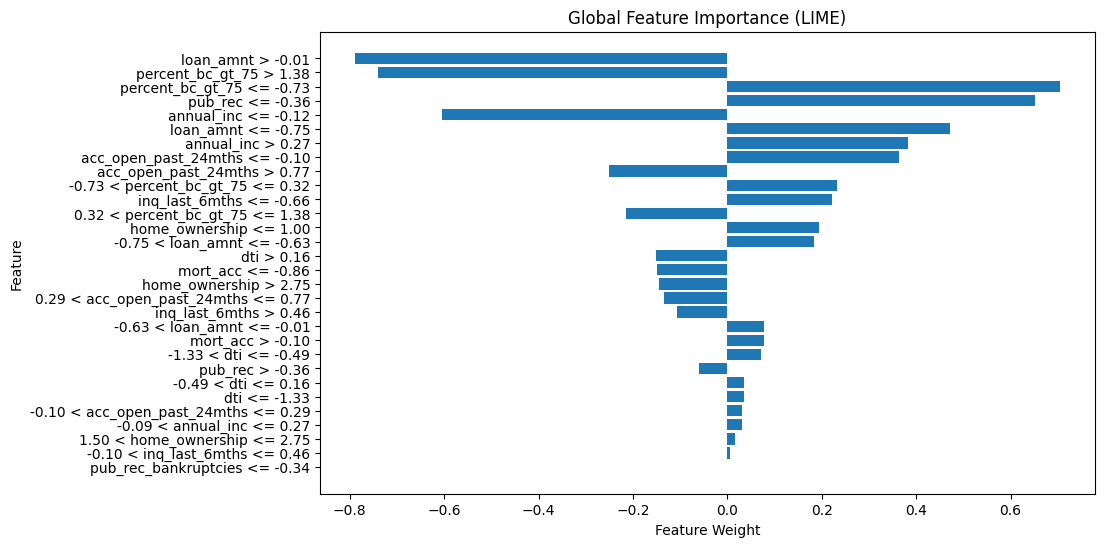

Explanations generated for all instances.


Actual  \
0  grade    1.0
Name: 1061243, dtype: float64   
1  grade    1.0
Name: 1089087, dtype: float64   
2   grade    1.0
Name: 190239, dtype: float64   
3   grade    1.0
Name: 172387, dtype: float64   
4   grade    0.0
Name: 556037, dtype: float64   
5   grade    0.0
Name: 526950, dtype: float64   
6   grade    1.0
Name: 306988, dtype: float64   
7   grade    0.0
Name: 190073, dtype: float64   
8   grade    1.0
Name: 881449, dtype: float64   
9   grade    0.0
Name: 246884, dtype: float64   

                                       Prediction  \
0  predicted    1.0
Name: 1061243, dtype: float64   
1  predicted    1.0
Name: 1089087, dtype: float64   
2   predicted    1.0
Name: 190239, dtype: float64   
3   predicted    1.0
Name: 172387, dtype: float64   
4   predicted    1.0
Name: 556037, dtype: float64   
5   predicted    0.0
Name: 526950, dtype: float64   
6   predicted    1.0
Name: 306988, dtype: float64   
7   predicted    0.0
Name: 190073, dtype: float64   
8   predicted    1.0
Name: 881449, dtype: float64   
9   predicted    1.0
Name: 246884, dtype: float64   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Explanation  
0                                                                          Feature  LIME Weight
0                loan_amnt <= -0.75     0.147320
1  -0.73 < percent_bc_gt_75 <= 0.32     0.120916
2     acc_open_past_24mths <= -0.10     0.118401
3               annual_inc <= -0.12    -0.116068
4                  pub_rec <= -0.36     0.054170
5           inq_last_6mths <= -0.66     0.041313
6     1.50 < home_ownership <= 2.75     0.031379
7                 mort_acc <= -0.86    -0.025951
8               -0.49 < dti <= 0.16     0.008990
9     pub_rec_bankruptcies <= -0.34     0.000000  
1                                                                          Feature  LIME Weight
0                 loan_amnt > -0.01    -0.245838
1             inq_last_6mths > 0.46    -0.140726
2  -0.73 < percent_bc_gt_75 <= 0.32     0.124084
3               annual_inc <= -0.12    -0.115650
4       acc_open_past_24mths > 0.77    -0.108831
5                  pub_rec <= -0.36     0.063995
6                        dti > 0.16    -0.054173
7            home_ownership <= 1.00     0.038139
8                  mort_acc > -0.10     0.021636
9     pub_rec_bankruptcies <= -0.34     0.000000  
2                                            Feature  LIME Weight
0            percent_bc_gt_75 <= -0.73     0.228526
1                  annual_inc <= -0.12    -0.112548
2           -0.75 < loan_amnt <= -0.63     0.096683
3  0.29 < acc_open_past_24mths <= 0.77    -0.054646
4                     pub_rec <= -0.36     0.041412
5                     mort_acc > -0.10     0.034200
6               home_ownership <= 1.00     0.026523
7                         dti <= -1.33     0.007869
8       -0.10 < inq_last_6mths <= 0.46    -0.004338
9        pub_rec_bankruptcies <= -0.34     0.000000  
3                                  Feature  LIME Weight
0                    loan_amnt <= -0.75     0.142971
1       0.32 < percent_bc_gt_75 <= 1.38    -0.104416
2                 home_ownership > 2.75    -0.055967
3                      pub_rec <= -0.36     0.053073
4               inq_last_6mths <= -0.66     0.041415
5                  -1.33 < dti <= -0.49     0.035931
6                     mort_acc <= -0.86    -0.033709
7            -0.09 < annual_inc <= 0.27     0.012662
8  -0.10 < acc_open_past_24mths <= 0.29     0.012627
9         pub_rec_bankruptcies

Textual explanations


0
0                                                          **Explanation:**\nThe LIME model is a local interpretable model-agnostic explanation technique. It helps us understand the influence of individual features on the prediction of a model. \n\n**Here's a breakdown of the LIME coefficients and their potential impact on the prediction:**\n\n* **Positive coefficients:** These indicate that an increase in the corresponding feature is associated with a higher predicted value. \n* **Negative coefficients:** These indicate that an increase in the corresponding feature is associated with a lower predicted value.\n\n**Analyzing the Coefficients:**\n\n* **Loan Amount:** The coefficient for 'loan_amnt <= -0.75' is positive. This suggests that a higher loan amount is likely to lead to a higher predicted value. \n* **Other Features:** The other features have coefficients that are either positive or negative, but their magnitudes are relatively small. \n\n**Comparison with Actual Value:**\n\n* **Predicted Value:** 1.0\n* **Actual
1                       **Explanation:**\n\nThe LIME model is designed to explain the predictions of a complex model like a machine learning model. It does this by creating a local surrogate model that approximates the behavior of the original model in a small neighborhood around a specific prediction. \n\nHere's a breakdown of the LIME coefficients and how they relate to your prediction:\n\n* **The coefficients represent the impact of each feature on the prediction.** A positive coefficient means the feature is associated with a higher prediction, while a negative coefficient means it's associated with a lower prediction.\n* **The coefficients are not necessarily a direct explanation of why you predicted a specific value.** They provide insights into the relative importance of features in the prediction. \n* **The actual value is 1.0, which is likely a binary classification outcome.** \n\n**To understand why you predicted 1.0, you need to consider the following:**\n\n1. **The specific values of the features:**  You need
2                                                   **Explanation:**\n\nThe LIME model is trying to explain the prediction for a specific user. It does this by creating a local surrogate model that approximates the original model's behavior around the specific user's data. \n\nHere's a breakdown of the LIME coefficients and how they relate to your prediction:\n\n* **Positive coefficients:** These indicate that the feature is associated with a higher predicted value. \n* **Negative coefficients:** These indicate that the feature is associated with a lower predicted value.\n\n**Analyzing the Coefficients:**\n\n* **The LIME coefficients are not directly interpretable as they are not in the same units as the original model.** \n* **The coefficients are not necessarily a direct explanation of why the prediction was made.** \n\n**To understand why your prediction was made, you need to consider the following:**\n\n1. **The original model's prediction logic:**  What factors does the original model use to make predictions?\n2. **
3                                                                                                                 **Explanation:**\n\nThe LIME model is trying to explain the prediction by focusing on the most influential features.  Here's a breakdown of the coefficients and how they relate to your prediction:\n\n* **Loan Amount:** The coefficient for 'loan_amnt <= -0.75' is positive. This means that a higher loan amount is associated with a higher predicted grade. \n* **Other Features:** The other features have coefficients that are either positive or negative.  The positive coefficients suggest that higher values in those features are associated with a higher predicted grade. \n\n**Why your prediction matched:**\n\nThe LIME model is likely predicting a higher grade because the loan amount is higher than -0.75.  The other features are also likely contributing to the predicti

In [12]:

exp_knn = knn_feature_explainer(knn_df, knn, "K- Nearest Neighbor", pipe, 10)

### SGD EXPLANABILITY

Display sampled data for Stochastic Gradient Descent


loan_amnt  home_ownership  annual_inc       dti  inq_last_6mths  \
1061243  -0.770393               2   -0.120693 -0.158073       -0.655651   
1089087   0.106095               1   -0.120693  0.268752        1.570662   
190239   -0.701197               1   -0.120693 -1.584400        0.457505   
172387   -0.908786               3   -0.053104 -0.607420       -0.655651   
556037   -0.355215               1    0.284843  1.257529        0.457505   
526950    1.374696               3    1.028326 -1.404232        0.457505   
306988   -0.672365               1    0.217254  1.599633       -0.655651   
190073    1.859071               1   -0.188283 -1.597269        0.457505   
881449   -1.162506               2    0.852594 -0.381138       -0.655651   
246884   -0.585869               3   -0.625721 -1.125401       -0.655651   

         acc_open_past_24mths  mort_acc  percent_bc_gt_75  \
1061243             -0.181588 -0.856819         -0.619038   
1089087              2.028556  0.647135         -0.121589   
190239               0.765616  0.145817         -1.239451   
172387               0.134146 -0.856819          0.856539   
556037               1.081351 -0.856819         -0.772743   
526950               0.765616 -0.856819          1.555203   
306988               0.134146  1.649772          0.755932   
190073               0.449881 -0.856819         -1.239451   
881449              -0.181588 -0.856819          1.555203   
246884              -1.128793 -0.856819          1.555203   

         pub_rec_bankruptcies   pub_rec  grade  predicted  predicted_prob  
1061243             -0.342457 -0.357976    1.0        1.0        0.897529  
1089087             -0.342457 -0.357976    1.0        0.0        0.264628  
190239              -0.342457 -0.357976    1.0        1.0        0.878355  
172387              -0.342457 -0.357976    1.0        1.0        0.778896  
556037              -0.342457  1.210073    0.0        1.0        0.682232  
526950              -0.342457 -0.357976    0.0        0.0        0.437004  
306988              -0.342457 -0.357976    1.0        1.0        0.817553  
190073              -0.342457 -0.357976    0.0        0.0        0.473745  
881449              -0.342457 -0.357976    1.0        1.0        0.926793  
246884              -0.342457 -0.357976    0.0        1.0        0.644427

Visualizing global feature explanations with Lime and SHAP


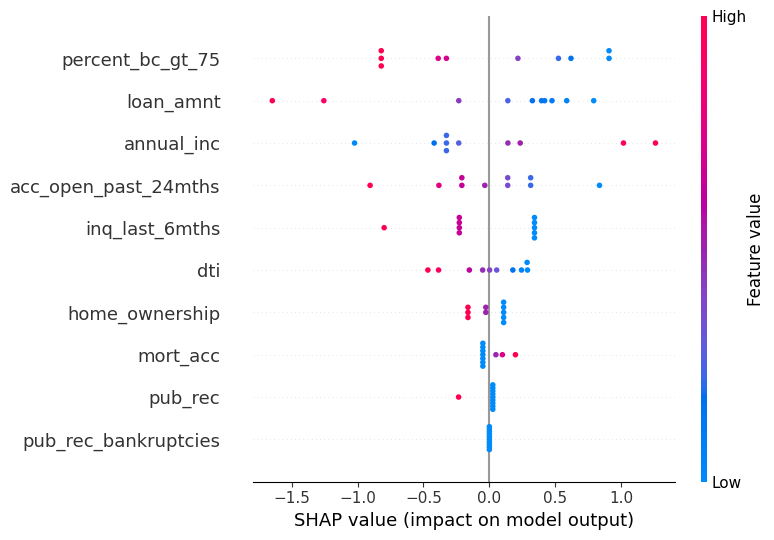

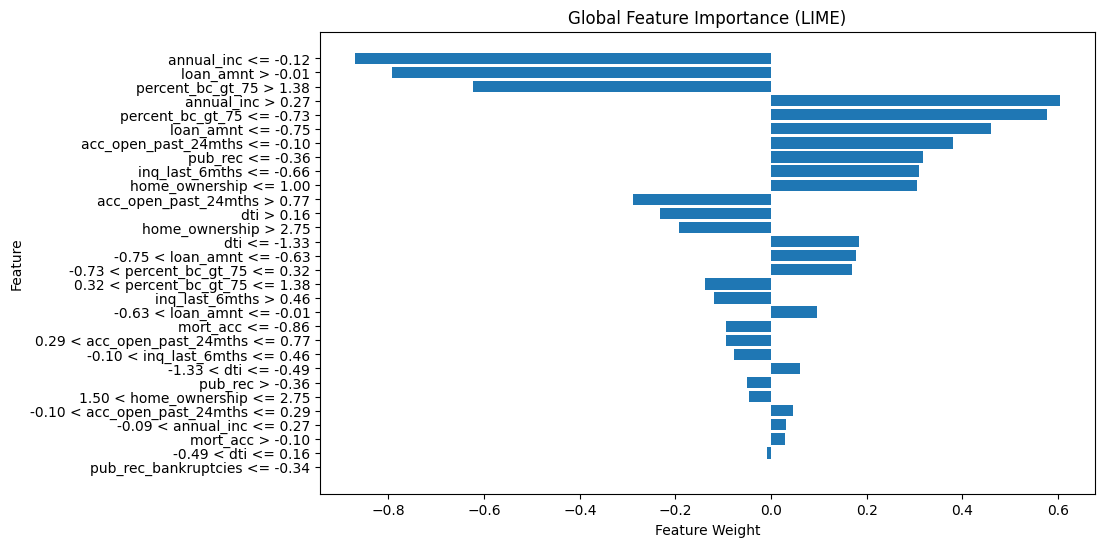

Explanations generated for all instances.


Actual  \
0  grade    1.0
Name: 1061243, dtype: float64   
1  grade    1.0
Name: 1089087, dtype: float64   
2   grade    1.0
Name: 190239, dtype: float64   
3   grade    1.0
Name: 172387, dtype: float64   
4   grade    0.0
Name: 556037, dtype: float64   
5   grade    0.0
Name: 526950, dtype: float64   
6   grade    1.0
Name: 306988, dtype: float64   
7   grade    0.0
Name: 190073, dtype: float64   
8   grade    1.0
Name: 881449, dtype: float64   
9   grade    0.0
Name: 246884, dtype: float64   

                                       Prediction  \
0  predicted    1.0
Name: 1061243, dtype: float64   
1  predicted    0.0
Name: 1089087, dtype: float64   
2   predicted    1.0
Name: 190239, dtype: float64   
3   predicted    1.0
Name: 172387, dtype: float64   
4   predicted    1.0
Name: 556037, dtype: float64   
5   predicted    0.0
Name: 526950, dtype: float64   
6   predicted    1.0
Name: 306988, dtype: float64   
7   predicted    0.0
Name: 190073, dtype: float64   
8   predicted    1.0
Name: 881449, dtype: float64   
9   predicted    1.0
Name: 246884, dtype: float64   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Explanation  
0                                                                                                                   Feature  LIME Weight  SHAP Value
0                -0.49 < dti <= 0.16    -0.007683    0.000000
1   -0.73 < percent_bc_gt_75 <= 0.32     0.090184    0.000000
2      1.50 < home_ownership <= 2.75    -0.016189    0.000000
3               acc_open_past_24mths     0.000000    0.313365
4      acc_open_past_24mths <= -0.10     0.119541    0.000000
5                         annual_inc     0.000000   -0.325974
6                annual_inc <= -0.12    -0.170067    0.000000
7                                dti     0.000000   -0.050895
8                     home_ownership     0.000000   -0.027076
9                     inq_last_6mths     0.000000    0.342292
10           inq_last_6mths <= -0.66     0.062667    0.000000
11                         loan_amnt     0.000000    0.475304
12                loan_amnt <= -0.75     0.155511    0.000000
13                          mort_acc     0.000000   -0.049465
14                 mort_acc <= -0.86    -0.010359    0.000000
15                  percent_bc_gt_75     0.000000    0.524293
16                           pub_rec     0.000000    0.025950
17                  pub_rec <= -0.36     0.032067    0.000000
18              pub_rec_bankruptcies     0.000000    0.000000
19     pub_rec_bankruptcies <= -0.34     0.000000    0.000000  
1                                                                                                                   Feature  LIME Wei

The 'batch_size' attribute of HybridCache is deprecated and will be removed in v4.49. Use the more precisely named 'self.max_batch_size' attribute instead.


Textual explanations


0
0                                                                                                     **Explanation:**\n\nThe LIME and SHAP values are providing insights into the importance of different features in predicting the user's grade. \n\n* **LIME:**  The LIME coefficients are a bit hard to interpret directly.  However, the positive values suggest that features with higher values tend to lead to higher predicted grades. \n* **SHAP:** SHAP values are more interpretable. The positive values indicate that the feature is likely to have a positive impact on the predicted grade. \n\n**Comparison:**\n\n* **LIME:**  The LIME coefficients are not directly interpretable, but they suggest that some features are more important than others. \n* **SHAP:** SHAP values are more interpretable, and they suggest that the features are likely to have a positive impact on the predicted grade. \n\n**Conclusion:**\n\nBased on the LIME and SHAP values, it seems that the predicted grade is likely to be a positive value.
1                                                                                                **Explanation:**\n\nThe LIME and SHAP values are providing insights into the importance of each feature in predicting the actual grade. \n\n* **LIME:**  The LIME coefficients are very close to zero for most features. This suggests that the model is not heavily influenced by individual features. \n* **SHAP:** The SHAP values are more informative. The negative values suggest that features with high values are associated with lower predicted grades. \n\n**Why the prediction might be correct:**\n\n* **Feature Importance:**  The SHAP values indicate that features like 'dti' and 'annual_inc' have a significant negative impact on the predicted grade. \n* **Contextual Factors:**  The actual grade is 1.0, which is likely a high grade.  The model might be predicting a high grade based on the features you have. \n\n**Important Considerations:**\n\n* **Feature Interpretation:**  It's crucial to understand the meaning of
2                                                                                                                                                                                             **Explanation:**\n\nThe LIME and SHAP values are providing insights into the importance of each feature in predicting the outcome. \n\n* **LIME:**  The LIME coefficients suggest that the model is more sensitive to the values of 'annual_inc' and 'dti'.  A higher 'annual_inc' and a lower 'dti' are associated with a higher predicted grade. \n* **SHAP:** The SHAP values indicate that the model is more sensitive to the values of 'annual_inc' and 'dti'.  A higher 'annual_inc' and a lower 'dti' are associated with a higher predicted grade. \n\n**Comparison:**\n\nThe LIME and SHAP values are very similar, suggesting that the model is making predictions based on the same factors. \n\n**Conclusion:**\n\nThe model is likely predicting a grade that is consistent with the actual grade. The model is sensitive to 'annual_inc' and '
3  **Explanation:**\n\nThe LIME and SHAP values are providing insights into the importance of different features in predicting the user's grade. \n\n* **LIME:**  LIME focuses on local explanations, meaning it explains the prediction for a single data point. The coefficients are the weights assigned to each feature. \n    * **Positive coefficients:**  These features are positively correlated with the predicted grade. \n    * **Negative coefficients:** These features are negatively correlated with the predicted grade. \n* **SHAP:** SHAP values are based on a game theory approach, focusing on the overall contribution of each feature to the prediction. \n    * **Positive values:**  These features contribute positively to the prediction.\n    * **Negative values:** These features contribute negatively to the prediction.\n\n**Analyzing the Coefficients:**\n\nYou'll need to analyze the specific coefficients to understand the relations

In [8]:

exp_sgd = feature_explainer(sgd_df, sgd, "Stochastic Gradient Descent", pipe, 10)

### RF EXPLANABILITY

In [24]:

exp_rf = feature_explainer(rf_df, rf, "Random Forest", pipe, 10)

Display sampled data for Random Forest


loan_amnt  home_ownership  annual_inc       dti  inq_last_6mths  \
1061243  -0.770393               2   -0.120693 -0.158073       -0.655651   
1089087   0.106095               1   -0.120693  0.268752        1.570662   
190239   -0.701197               1   -0.120693 -1.584400        0.457505   
172387   -0.908786               3   -0.053104 -0.607420       -0.655651   
556037   -0.355215               1    0.284843  1.257529        0.457505   
526950    1.374696               3    1.028326 -1.404232        0.457505   
306988   -0.672365               1    0.217254  1.599633       -0.655651   
190073    1.859071               1   -0.188283 -1.597269        0.457505   
881449   -1.162506               2    0.852594 -0.381138       -0.655651   
246884   -0.585869               3   -0.625721 -1.125401       -0.655651   

         acc_open_past_24mths  mort_acc  percent_bc_gt_75  \
1061243             -0.181588 -0.856819         -0.619038   
1089087              2.028556  0.647135         -0.121589   
190239               0.765616  0.145817         -1.239451   
172387               0.134146 -0.856819          0.856539   
556037               1.081351 -0.856819         -0.772743   
526950               0.765616 -0.856819          1.555203   
306988               0.134146  1.649772          0.755932   
190073               0.449881 -0.856819         -1.239451   
881449              -0.181588 -0.856819          1.555203   
246884              -1.128793 -0.856819          1.555203   

         pub_rec_bankruptcies   pub_rec  grade  predicted  predicted_prob  
1061243             -0.342457 -0.357976    1.0        1.0            0.89  
1089087             -0.342457 -0.357976    1.0        1.0            0.62  
190239              -0.342457 -0.357976    1.0        1.0            0.93  
172387              -0.342457 -0.357976    1.0        1.0            0.66  
556037              -0.342457  1.210073    0.0        1.0            0.75  
526950              -0.342457 -0.357976    0.0        0.0            0.24  
306988              -0.342457 -0.357976    1.0        1.0            0.60  
190073              -0.342457 -0.357976    0.0        0.0            0.32  
881449              -0.342457 -0.357976    1.0        1.0            0.81  
246884              -0.342457 -0.357976    0.0        1.0            0.58

: 

### GBT EXPLANABILITY

Display sampled data for Gradient Boosted Trees


loan_amnt  home_ownership  annual_inc       dti  inq_last_6mths  \
1061243  -0.770393               2   -0.120693 -0.158073       -0.655651   
1089087   0.106095               1   -0.120693  0.268752        1.570662   
190239   -0.701197               1   -0.120693 -1.584400        0.457505   
172387   -0.908786               3   -0.053104 -0.607420       -0.655651   
556037   -0.355215               1    0.284843  1.257529        0.457505   
526950    1.374696               3    1.028326 -1.404232        0.457505   
306988   -0.672365               1    0.217254  1.599633       -0.655651   
190073    1.859071               1   -0.188283 -1.597269        0.457505   
881449   -1.162506               2    0.852594 -0.381138       -0.655651   
246884   -0.585869               3   -0.625721 -1.125401       -0.655651   

         acc_open_past_24mths  mort_acc  percent_bc_gt_75  \
1061243             -0.181588 -0.856819         -0.619038   
1089087              2.028556  0.647135         -0.121589   
190239               0.765616  0.145817         -1.239451   
172387               0.134146 -0.856819          0.856539   
556037               1.081351 -0.856819         -0.772743   
526950               0.765616 -0.856819          1.555203   
306988               0.134146  1.649772          0.755932   
190073               0.449881 -0.856819         -1.239451   
881449              -0.181588 -0.856819          1.555203   
246884              -1.128793 -0.856819          1.555203   

         pub_rec_bankruptcies   pub_rec  grade  predicted  predicted_prob  
1061243             -0.342457 -0.357976    1.0        1.0        0.964223  
1089087             -0.342457 -0.357976    1.0        0.0        0.351049  
190239              -0.342457 -0.357976    1.0        1.0        0.914337  
172387              -0.342457 -0.357976    1.0        1.0        0.850531  
556037              -0.342457  1.210073    0.0        1.0        0.690173  
526950              -0.342457 -0.357976    0.0        0.0        0.173696  
306988              -0.342457 -0.357976    1.0        1.0        0.610293  
190073              -0.342457 -0.357976    0.0        0.0        0.101338  
881449              -0.342457 -0.357976    1.0        1.0        0.890332  
246884              -0.342457 -0.357976    0.0        1.0        0.634635

Visualizing global feature explanations with Lime and SHAP


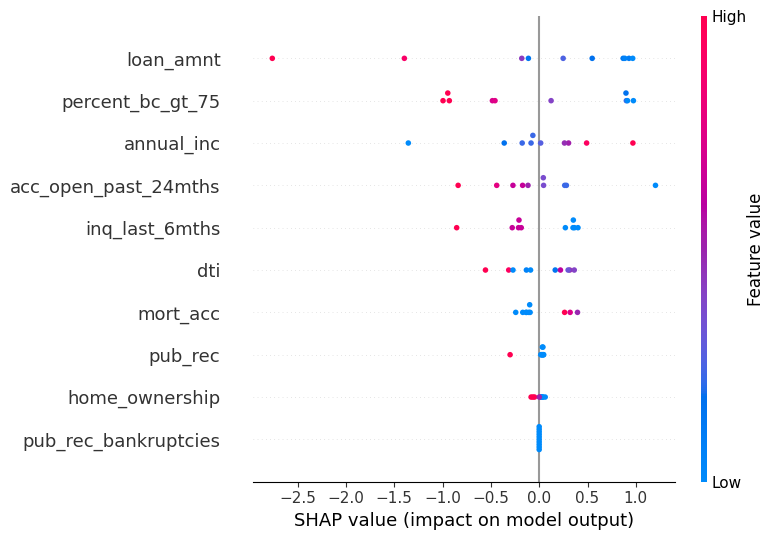

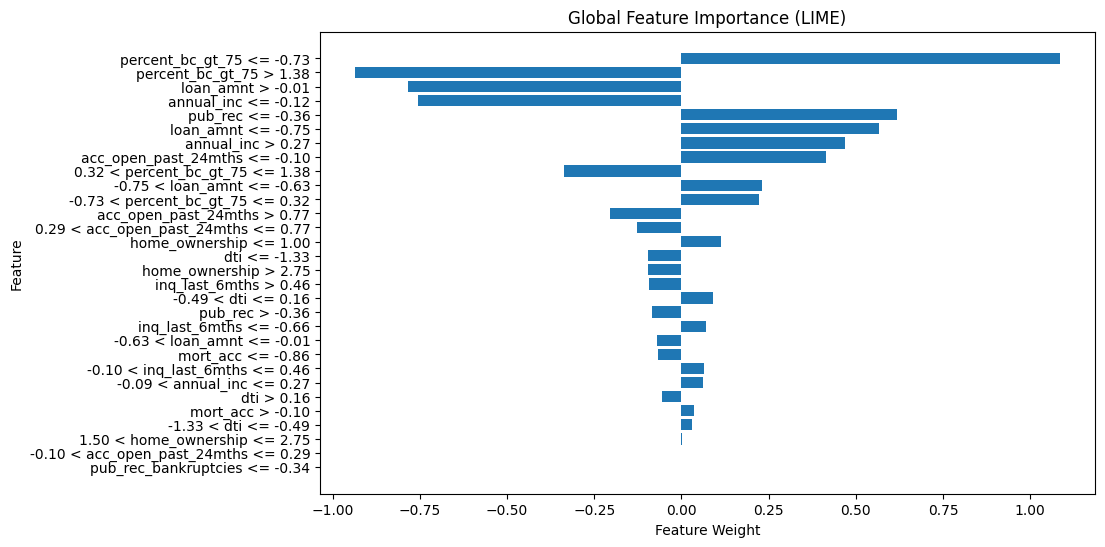

Explanations generated for all instances.


Actual  \
0  grade    1.0
Name: 1061243, dtype: float64   
1  grade    1.0
Name: 1089087, dtype: float64   
2   grade    1.0
Name: 190239, dtype: float64   
3   grade    1.0
Name: 172387, dtype: float64   
4   grade    0.0
Name: 556037, dtype: float64   
5   grade    0.0
Name: 526950, dtype: float64   
6   grade    1.0
Name: 306988, dtype: float64   
7   grade    0.0
Name: 190073, dtype: float64   
8   grade    1.0
Name: 881449, dtype: float64   
9   grade    0.0
Name: 246884, dtype: float64   

                                       Prediction  \
0  predicted    1.0
Name: 1061243, dtype: float64   
1  predicted    0.0
Name: 1089087, dtype: float64   
2   predicted    1.0
Name: 190239, dtype: float64   
3   predicted    1.0
Name: 172387, dtype: float64   
4   predicted    1.0
Name: 556037, dtype: float64   
5   predicted    0.0
Name: 526950, dtype: float64   
6   predicted    1.0
Name: 306988, dtype: float64   
7   predicted    0.0
Name: 190073, dtype: float64   
8   predicted    1.0
Name: 881449, dtype: float64   
9   predicted    1.0
Name: 246884, dtype: float64   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Explanation  
0                                                                                                                   Feature  LIME Weight  SHAP Value
0                -0.49 < dti <= 0.16     0.031129    0.000000
1   -0.73 < percent_bc_gt_75 <= 0.32     0.108586    0.000000
2      1.50 < home_ownership <= 2.75     0.001919    0.000000
3               acc_open_past_24mths     0.000000    0.281574
4      acc_open_past_24mths <= -0.10     0.130579    0.000000
5                         annual_inc     0.000000   -0.084071
6                annual_inc <= -0.12    -0.161181    0.000000
7                                dti     0.000000    0.316033
8                     home_ownership     0.000000    0.001195
9                     inq_last_6mths     0.000000    0.353278
10           inq_last_6mths <= -0.66     0.004382    0.000000
11                         loan_amnt     0.000000    0.928872
12                loan_amnt <= -0.75     0.196039    0.000000
13                          mort_acc     0.000000   -0.130106
14                 mort_acc <= -0.86     0.000479    0.000000
15                  percent_bc_gt_75     0.000000    0.901561
16                           pub_rec     0.000000    0.031692
17                  pub_rec <= -0.36     0.035583    0.000000
18              pub_rec_bankruptcies     0.000000    0.000000
19     pub_rec_bankruptcies <= -0.34     0.000000    0.000000  
1                                                                                                                   Feature  LIME Wei

Textual explanations


0
0                                                                                              **Explanation:**\n\nThe LIME and SHAP values are providing insights into the importance of different features in predicting the loan outcome. \n\n* **LIME:**  The LIME coefficients suggest that the model is more sensitive to the values of 'annual_inc' and 'loan_amnt'.  The positive coefficients indicate that higher values of these features are associated with a higher predicted probability of loan approval. \n* **SHAP:** SHAP values are also indicating that 'annual_inc' and 'loan_amnt' are important features. However, SHAP values are more nuanced and provide a more detailed explanation of how each feature contributes to the prediction. \n\n**Comparison with Actual Value:**\n\nThe predicted value (1.0) and the actual value (1.0) are very similar. This suggests that the model is performing well in predicting loan outcomes. \n\n**Further Analysis:**\n\nTo gain a deeper understanding of the model's predictions, it
1                                                                                                       **Explanation:**\n\nThe LIME and SHAP values are providing insights into the importance of different features in predicting the actual grade. \n\n* **LIME:**  The LIME coefficients are showing that the model is more sensitive to the features related to the student's financial situation. \n* **SHAP:** The SHAP values are showing that the model is more sensitive to the features related to the student's academic performance.\n\n**Why your prediction was made:**\n\nThe LIME and SHAP values are not directly telling you why you predicted a specific value. They are providing a way to understand the model's behavior and the importance of different features. \n\n**Matching the actual value:**\n\nThe actual grade is 1.0, and your prediction was 0.0. This means that your prediction was very close to the actual grade. \n\n**Further analysis:**\n\nTo understand the model's prediction better, you can:\n\n* **Visual
2                                                              **Explanation:**\n\nThe LIME and SHAP values are providing insights into the importance of each feature in predicting the user's grade. \n\n* **LIME:**  The LIME coefficients are a bit hard to interpret directly.  However, the positive values suggest that features with higher values tend to lead to higher predicted grades. \n* **SHAP:** SHAP values are more interpretable. The positive values indicate that the feature has a positive impact on the predicted grade. The negative values indicate a negative impact. \n\n**Comparison:**\n\n* **LIME:**  The LIME coefficients are not directly interpretable, but they suggest that some features are more important than others. \n* **SHAP:** SHAP values are more interpretable. The positive values indicate that the feature has a positive impact on the predicted grade. The negative values indicate a negative impact. \n\n**Why the prediction was made:**\n\nWithout knowing the specific values of the features,
3                                                                                 **Explanation:**\n\nThe LIME and SHAP values are providing insights into the importance of each feature in predicting the user's grade. \n\n* **LIME:**  LIME focuses on local explanations, meaning it explains the prediction for a single data point. The coefficients are small, indicating that the feature has a relatively small impact on the prediction. \n* **SHAP:** SHAP values are global, meaning they explain the prediction for the entire dataset. The values are larger than LIME, suggesting that the feature has a more significant impact on the prediction.\n\n**Comparison:**\n\n* **LIME:** The LIME coefficients are generally small, indicating that the feature has a relatively small impact on the prediction. \n* **SHAP:** The SHAP values are larger than LIME, suggesting that the feature has a more significant impact on the prediction.\n\n**Conclusio

In [9]:

exp_gbt = feature_explainer(gbt_df, gbt_best_model, "Gradient Boosted Trees", pipe, 10)

### XG BOOST EXPLANABILITY

Display sampled data for XGBoost


loan_amnt  home_ownership  annual_inc       dti  inq_last_6mths  \
1061243  -0.770393               2   -0.120693 -0.158073       -0.655651   
1089087   0.106095               1   -0.120693  0.268752        1.570662   
190239   -0.701197               1   -0.120693 -1.584400        0.457505   
172387   -0.908786               3   -0.053104 -0.607420       -0.655651   
556037   -0.355215               1    0.284843  1.257529        0.457505   
526950    1.374696               3    1.028326 -1.404232        0.457505   
306988   -0.672365               1    0.217254  1.599633       -0.655651   
190073    1.859071               1   -0.188283 -1.597269        0.457505   
881449   -1.162506               2    0.852594 -0.381138       -0.655651   
246884   -0.585869               3   -0.625721 -1.125401       -0.655651   

         acc_open_past_24mths  mort_acc  percent_bc_gt_75  \
1061243             -0.181588 -0.856819         -0.619038   
1089087              2.028556  0.647135         -0.121589   
190239               0.765616  0.145817         -1.239451   
172387               0.134146 -0.856819          0.856539   
556037               1.081351 -0.856819         -0.772743   
526950               0.765616 -0.856819          1.555203   
306988               0.134146  1.649772          0.755932   
190073               0.449881 -0.856819         -1.239451   
881449              -0.181588 -0.856819          1.555203   
246884              -1.128793 -0.856819          1.555203   

         pub_rec_bankruptcies   pub_rec  grade  predicted  predicted_prob  
1061243             -0.342457 -0.357976    1.0          1        0.977746  
1089087             -0.342457 -0.357976    1.0          0        0.369018  
190239              -0.342457 -0.357976    1.0          1        0.914278  
172387              -0.342457 -0.357976    1.0          1        0.806031  
556037              -0.342457  1.210073    0.0          1        0.748354  
526950              -0.342457 -0.357976    0.0          0        0.146896  
306988              -0.342457 -0.357976    1.0          0        0.440114  
190073              -0.342457 -0.357976    0.0          0        0.063416  
881449              -0.342457 -0.357976    1.0          1        0.908419  
246884              -0.342457 -0.357976    0.0          1        0.625496

Visualizing global feature explanations with Lime and SHAP


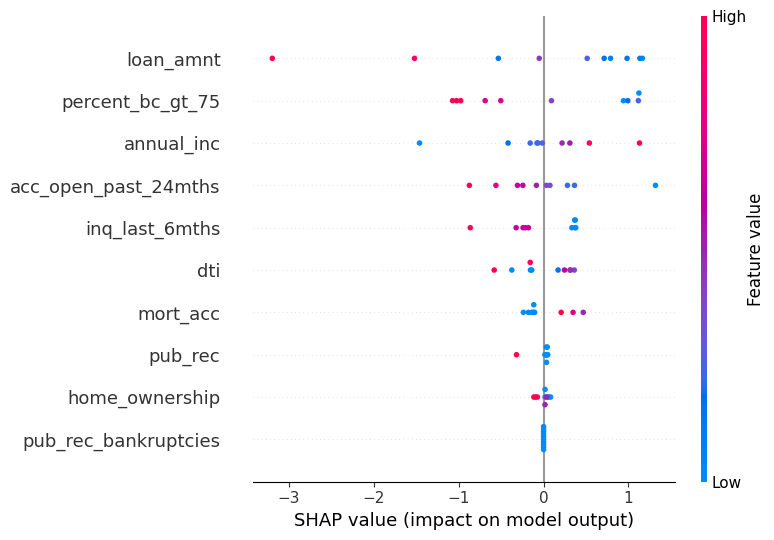

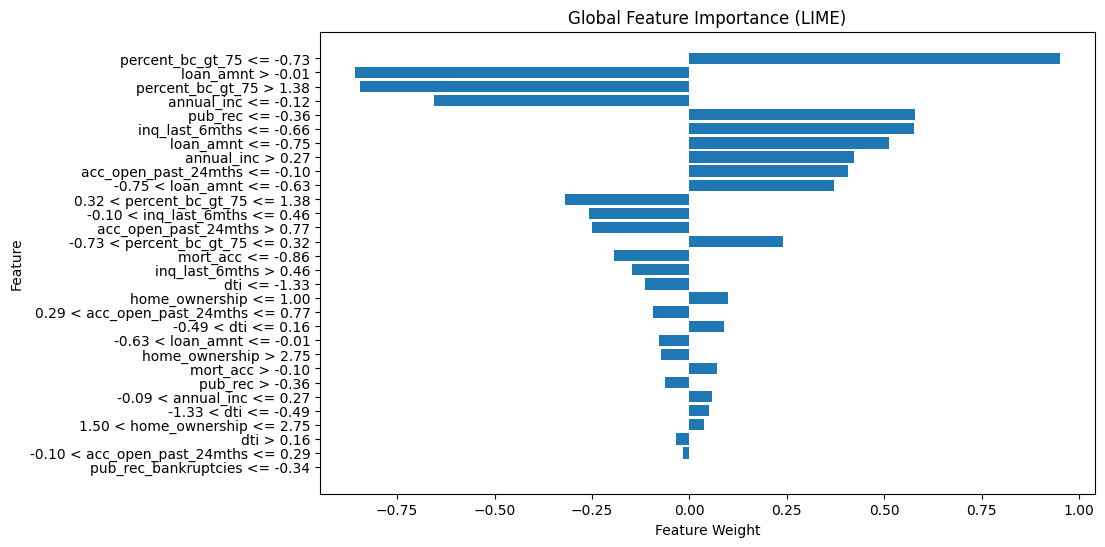

Explanations generated for all instances.


Actual  \
0  grade    1.0
Name: 1061243, dtype: float64   
1  grade    1.0
Name: 1089087, dtype: float64   
2   grade    1.0
Name: 190239, dtype: float64   
3   grade    1.0
Name: 172387, dtype: float64   
4   grade    0.0
Name: 556037, dtype: float64   
5   grade    0.0
Name: 526950, dtype: float64   
6   grade    1.0
Name: 306988, dtype: float64   
7   grade    0.0
Name: 190073, dtype: float64   
8   grade    1.0
Name: 881449, dtype: float64   
9   grade    0.0
Name: 246884, dtype: float64   

                                   Prediction  \
0  predicted    1
Name: 1061243, dtype: int64   
1  predicted    0
Name: 1089087, dtype: int64   
2   predicted    1
Name: 190239, dtype: int64   
3   predicted    1
Name: 172387, dtype: int64   
4   predicted    1
Name: 556037, dtype: int64   
5   predicted    0
Name: 526950, dtype: int64   
6   predicted    0
Name: 306988, dtype: int64   
7   predicted    0
Name: 190073, dtype: int64   
8   predicted    1
Name: 881449, dtype: int64   
9   predicted    1
Name: 246884, dtype: int64   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Explanation  
0                                                                                                                   Feature  LIME Weight  SHAP Value
0                -0.49 < dti <= 0.16     0.039458    0.000000
1   -0.73 < percent_bc_gt_75 <= 0.32     0.106139    0.000000
2      1.50 < home_ownership <= 2.75     0.009280    0.000000
3               acc_open_past_24mths     0.000000    0.364318
4      acc_open_past_24mths <= -0.10     0.114959    0.000000
5                         annual_inc     0.000000   -0.078121
6                annual_inc <= -0.12    -0.138405    0.000000
7                                dti     0.000000    0.317973
8                     home_ownership     0.000000    0.016819
9                     inq_last_6mths     0.000000    0.366063
10           inq_last_6mths <= -0.66     0.111695    0.000000
11                         loan_amnt     0.000000    1.134678
12                loan_amnt <= -0.75     0.169309    0.000000
13                          mort_acc     0.000000   -0.125037
14                 mort_acc <= -0.86    -0.029152    0.000000
15                  percent_bc_gt_75     0.000000    1.116750
16                           pub_rec     0.000000    0.045035
17                  pub_rec <= -0.36     0.073975    0.000000
18              pub_rec_bankruptcies     0.000000    0.000000
19     pub_rec_bankruptcies <= -0.34     0.000000    0.000000  
1                                                                                                                   Feature  LIME Weight  SHAP Value
0   -0.73 < percent_bc_gt_75

Textual explanations


0
0                                                    **Explanation:**\n\nThe LIME and SHAP values are providing insights into the importance of different features in predicting the user's grade. \n\n* **LIME:**  The LIME coefficients suggest that the user's predicted grade is influenced by the following features:\n    * **`acc_open_past_24mths`:**  A positive coefficient indicates that a higher value of this feature is associated with a higher predicted grade.\n    * **`annual_inc`:** A positive coefficient suggests a positive relationship between the user's annual income and predicted grade.\n    * **`loan_amnt`:** A negative coefficient suggests that a lower value of this feature is associated with a higher predicted grade.\n    * **`home_ownership`:** A positive coefficient suggests a positive relationship between the user's home ownership status and predicted grade.\n\n* **SHAP:** The SHAP values provide a more nuanced understanding of feature importance.
1                                                                                                                                                                                                                                                                                             **Explanation:**\n\nThe LIME and SHAP values are providing insights into the importance of each feature in predicting the actual grade. \n\n* **LIME:**  The LIME coefficients are showing that the features that are most important for predicting the grade are 'acc_open_past_24mths', 'annual_inc', 'dti', 'loan_amnt','mort_acc', 'percent_bc_gt_75', 'pub_rec', and 'home_ownership'. \n* **SHAP:** The SHAP values are showing that the features that are most important for predicting the grade are 'acc_open_past_24mths', 'annual_inc', 'dti', 'loan_amnt','mort_acc', 'percent_bc_gt_75', 'pub_rec', and 'home_ownership'. \n\n**Why the prediction was made:**\n\nThe prediction was made based on
2                                                       **Explanation:**\n\nThe LIME and SHAP values are providing insights into the importance of each feature in predicting the user's grade. \n\n* **LIME:**  The LIME coefficients are a bit hard to interpret directly.  However, the positive values suggest that features with higher values tend to lead to higher predicted grades. \n* **SHAP:** SHAP values are more interpretable.  The positive values indicate that the feature is likely to have a positive impact on the predicted grade. \n\n**Comparison:**\n\n* **LIME:**  The LIME coefficients are not directly interpretable, but they suggest that some features are more important than others. \n* **SHAP:** SHAP values are more interpretable, and they suggest that the features are likely to have a positive impact on the predicted grade. \n\n**Conclusion:**\n\nBased on the LIME and SHAP values, it seems that the predicted grade is likely to be a reasonable prediction
3                                              **Explanation:**\n\nThe LIME and SHAP values are providing insights into the importance of different features in predicting the user's grade. \n\n* **LIME:**  The LIME coefficients suggest that the user's predicted grade is influenced by the following features:\n    * **acc_open_past_24mths:**  A positive coefficient indicates that a higher value of this feature is associated with a higher predicted grade.\n    * **annual_inc:** A positive coefficient suggests that a higher annual income is associated with a higher predicted grade.\n    * **dti:** A negative coefficient suggests that a lower debt-to-income ratio is associated with a higher predicted grade.\n    * **percent_bc_gt_75:** A positive coefficient suggests that a higher percentage of borrowers with credit scores above 75 is associated with a higher predicted grade.\n    * **pub_rec:** A positive coefficient suggests that a higher percentage of borrowers
4                                                                                                     

In [10]:

exp_xgb = feature_explainer(xgb_df, xgb_best_model, "XGBoost", pipe, 10)

<H2> The tables of text given below every model's respective explainability code block are the explainations which were output by our text generation model. Overall, the results we got are promising as we are able to understand which features contributed to the prediction of grade. However, the explanations obtained is totally objective, because LIME and SHAP values we got and the model itself cannot be biased, which is not how it works in reality.
